In [1]:
!pip install geoplot


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 68.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import geoplot

In [3]:
df = pd.read_csv('/content/data.csv', encoding = "ISO-8859-1")
df.head()

<ipython-input-3-b7895f5e7d70>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/data.csv', encoding = "ISO-8859-1")


stn_code       sampling_date           state   location agency  \
0    150.0  February - M021990  Andhra Pradesh  Hyderabad    NaN   
1    151.0  February - M021990  Andhra Pradesh  Hyderabad    NaN   
2    152.0  February - M021990  Andhra Pradesh  Hyderabad    NaN   
3    150.0     March - M031990  Andhra Pradesh  Hyderabad    NaN   
4    151.0     March - M031990  Andhra Pradesh  Hyderabad    NaN   

                                 type  so2   no2  rspm  spm  \
0  Residential, Rural and other Areas  4.8  17.4   NaN  NaN   
1                     Industrial Area  3.1   7.0   NaN  NaN   
2  Residential, Rural and other Areas  6.2  28.5   NaN  NaN   
3  Residential, Rural and other Areas  6.3  14.7   NaN  NaN   
4                     Industrial Area  4.7   7.5   NaN  NaN   

  location_monitoring_station  pm2_5        date  
0                         NaN    NaN  1990-02-01  
1                         NaN    NaN  1990-02-01  
2                         NaN    NaN  1990-02-01  
3                         NaN    NaN  1990-03-01  
4                         NaN    NaN  1990-03-01

In [4]:
df['date'] = pd.to_datetime(df['date'],format='%Y-%m-%d') # date parse
df['year'] = df['date'].dt.year # year
df['year'] = df['year'].fillna(df["year"].min())
df['year'] = df['year'].values.astype(int)

In [7]:
print (df.count())

stn_code                       291665
sampling_date                  435739
state                          435742
location                       435739
agency                         286261
type                           430349
so2                            401096
no2                            419509
rspm                           395520
spm                            198355
location_monitoring_station    408251
pm2_5                            9314
date                           435735
year                           435742
dtype: int64


EDA

NULL Values

In [8]:
def printNullValues(df):
    total = df.isnull().sum().sort_values(ascending = False)
    total = total[df.isnull().sum().sort_values(ascending = False) != 0]
    percent = total / len(df) * 100
    percent = percent[df.isnull().sum().sort_values(ascending = False) != 0]
    concat = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
    print (concat)
    print ( "-------------")


In [9]:
printNullValues(df)


                              Total    Percent
pm2_5                        426428  97.862497
spm                          237387  54.478797
agency                       149481  34.304933
stn_code                     144077  33.064749
rspm                          40222   9.230692
so2                           34646   7.951035
location_monitoring_station   27491   6.309009
no2                           16233   3.725370
type                           5393   1.237659
date                              7   0.001606
sampling_date                     3   0.000688
location                          3   0.000688
-------------


TYPE

In [10]:
df["type"].value_counts()


Residential, Rural and other Areas    179014
Industrial Area                        96091
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8980
Sensitive Areas                         5536
RIRUO                                   1304
Sensitive                                495
Industrial                               233
Residential                              158
Name: type, dtype: int64

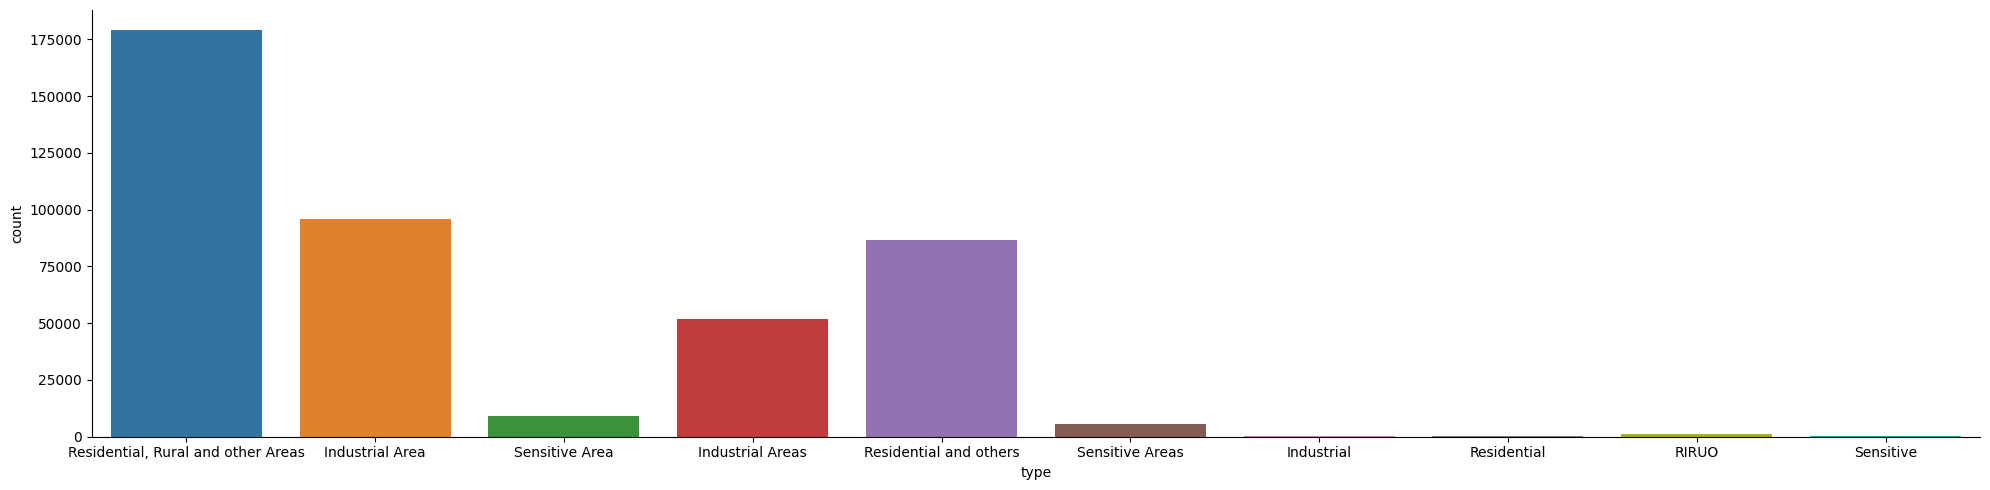

In [11]:
sns.catplot(x = "type", kind = "count",  data = df, height=5, aspect = 4)


Analysis by type and pollution means

<ipython-input-12-31a14bd14b5e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grp = df.groupby(["type"]).mean()["so2"].to_frame()


<Axes: xlabel='type'>

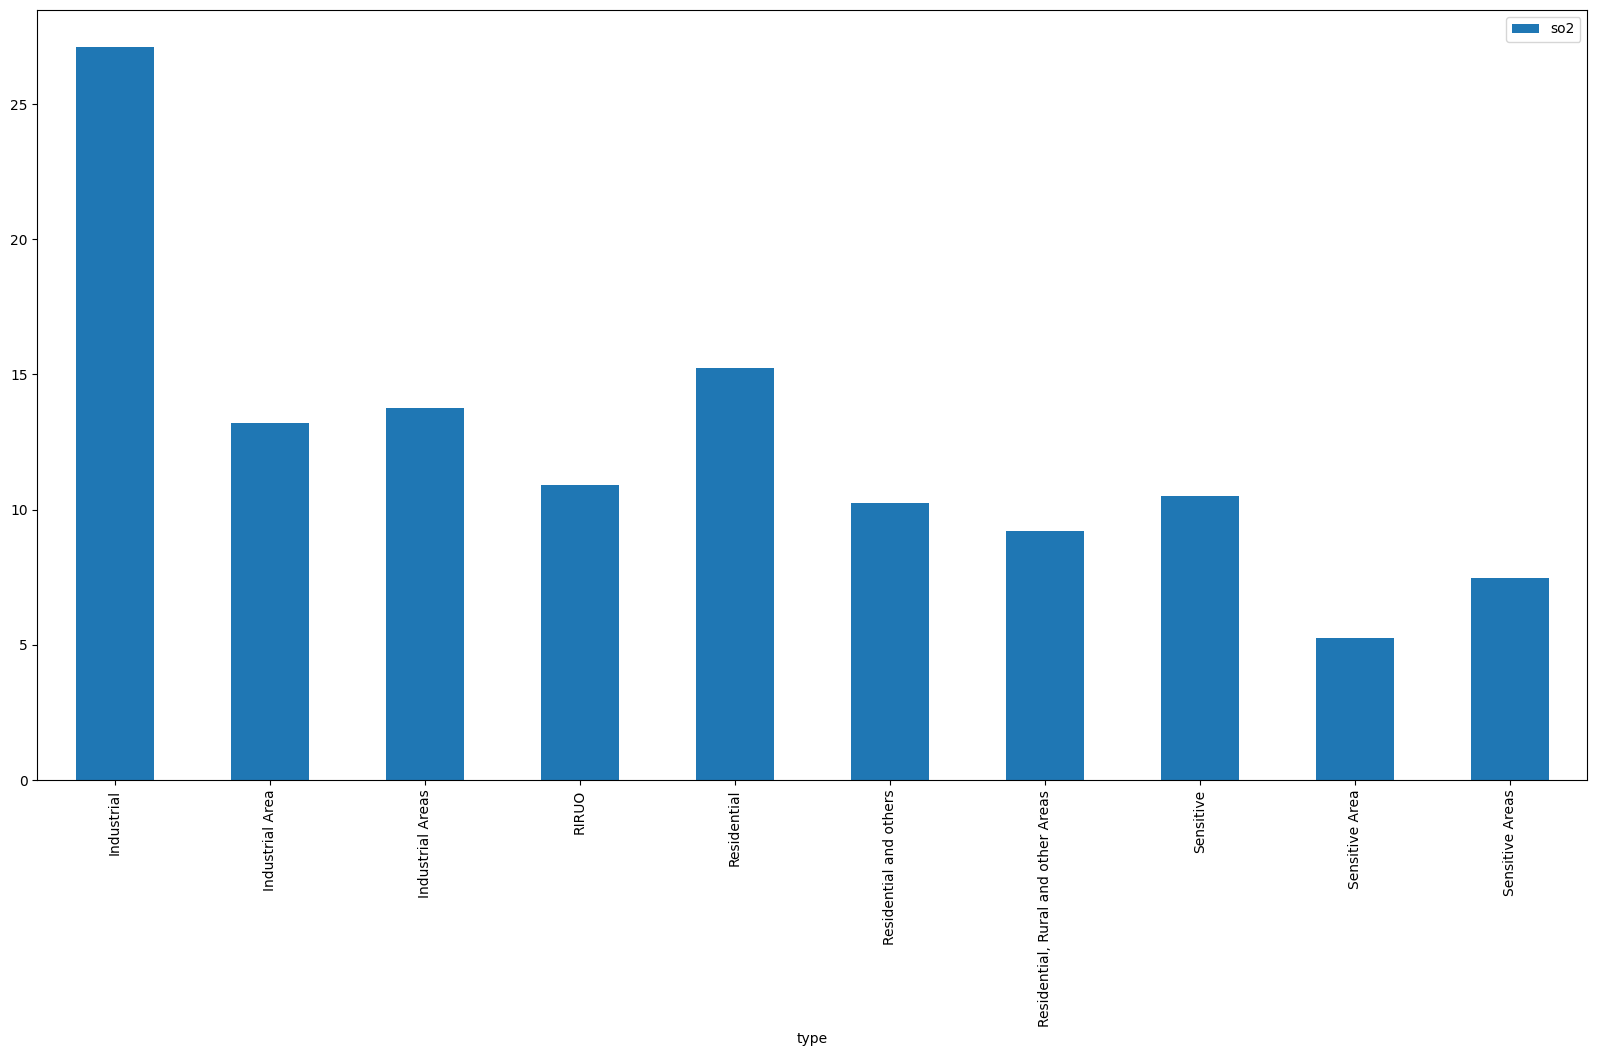

In [12]:
grp = df.groupby(["type"]).mean()["so2"].to_frame()
grp.plot.bar(figsize = (20,10))

<ipython-input-13-c6e2c1378944>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grp = df.groupby(["type"]).mean()["no2"].to_frame()


<Axes: xlabel='type'>

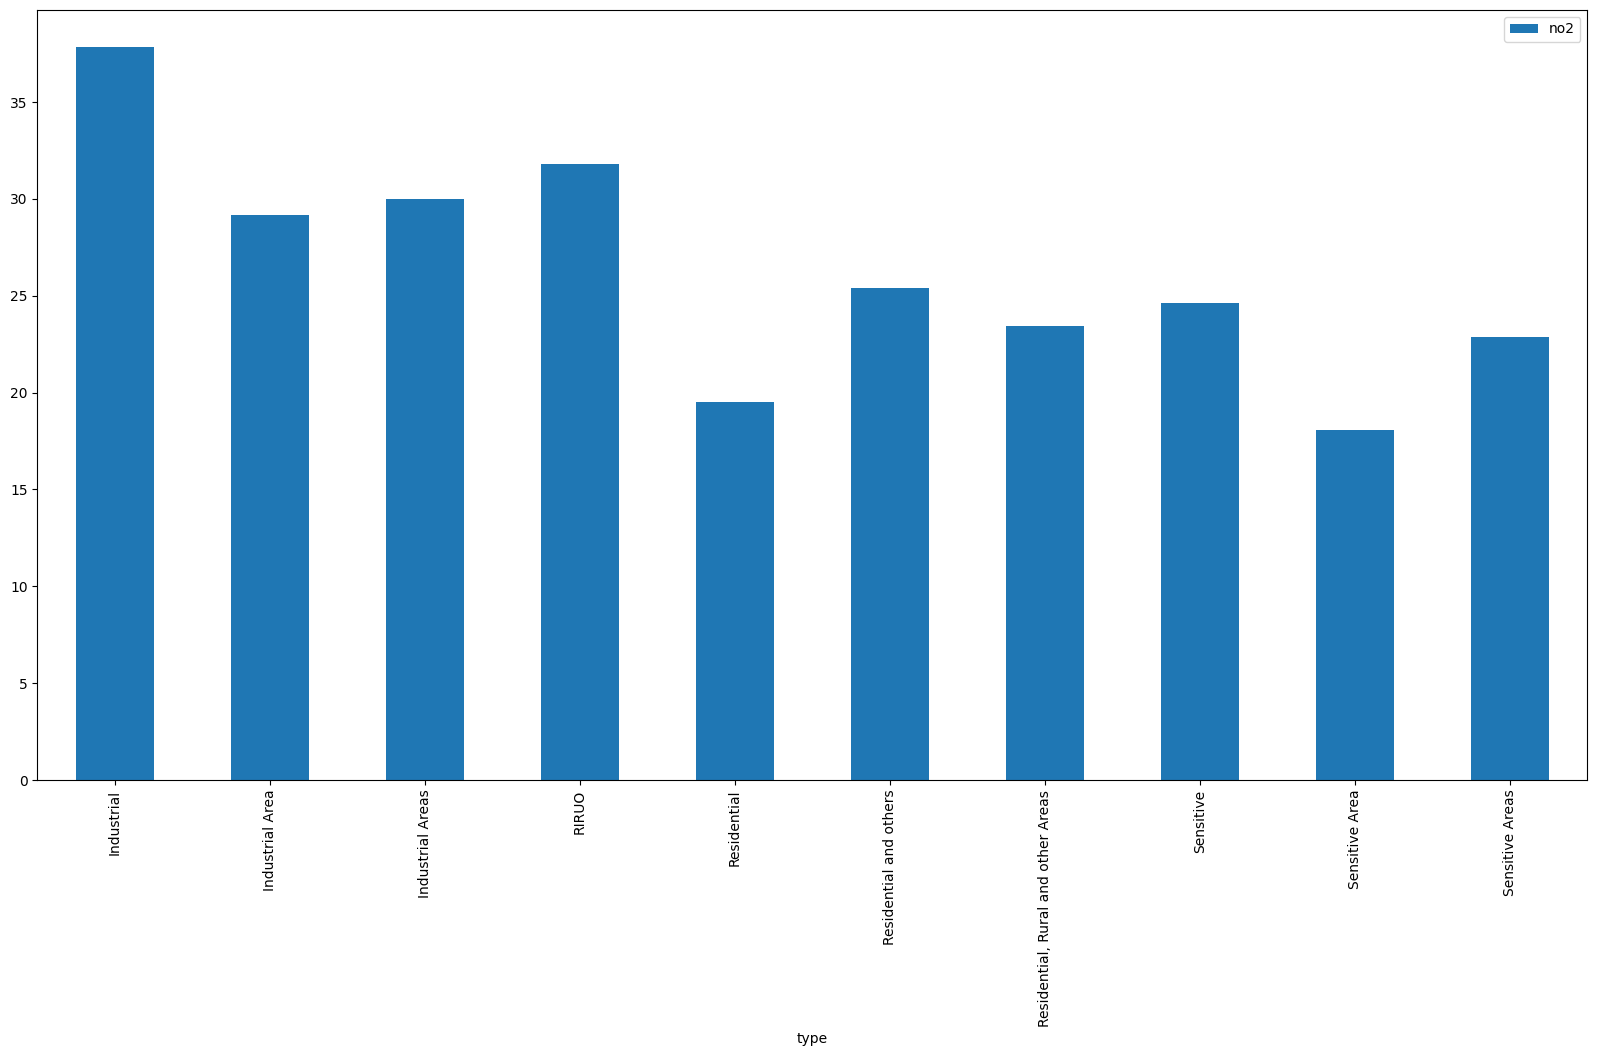

In [13]:
grp = df.groupby(["type"]).mean()["no2"].to_frame()
grp.plot.bar(figsize = (20,10))

SO2

<Axes: xlabel='state'>

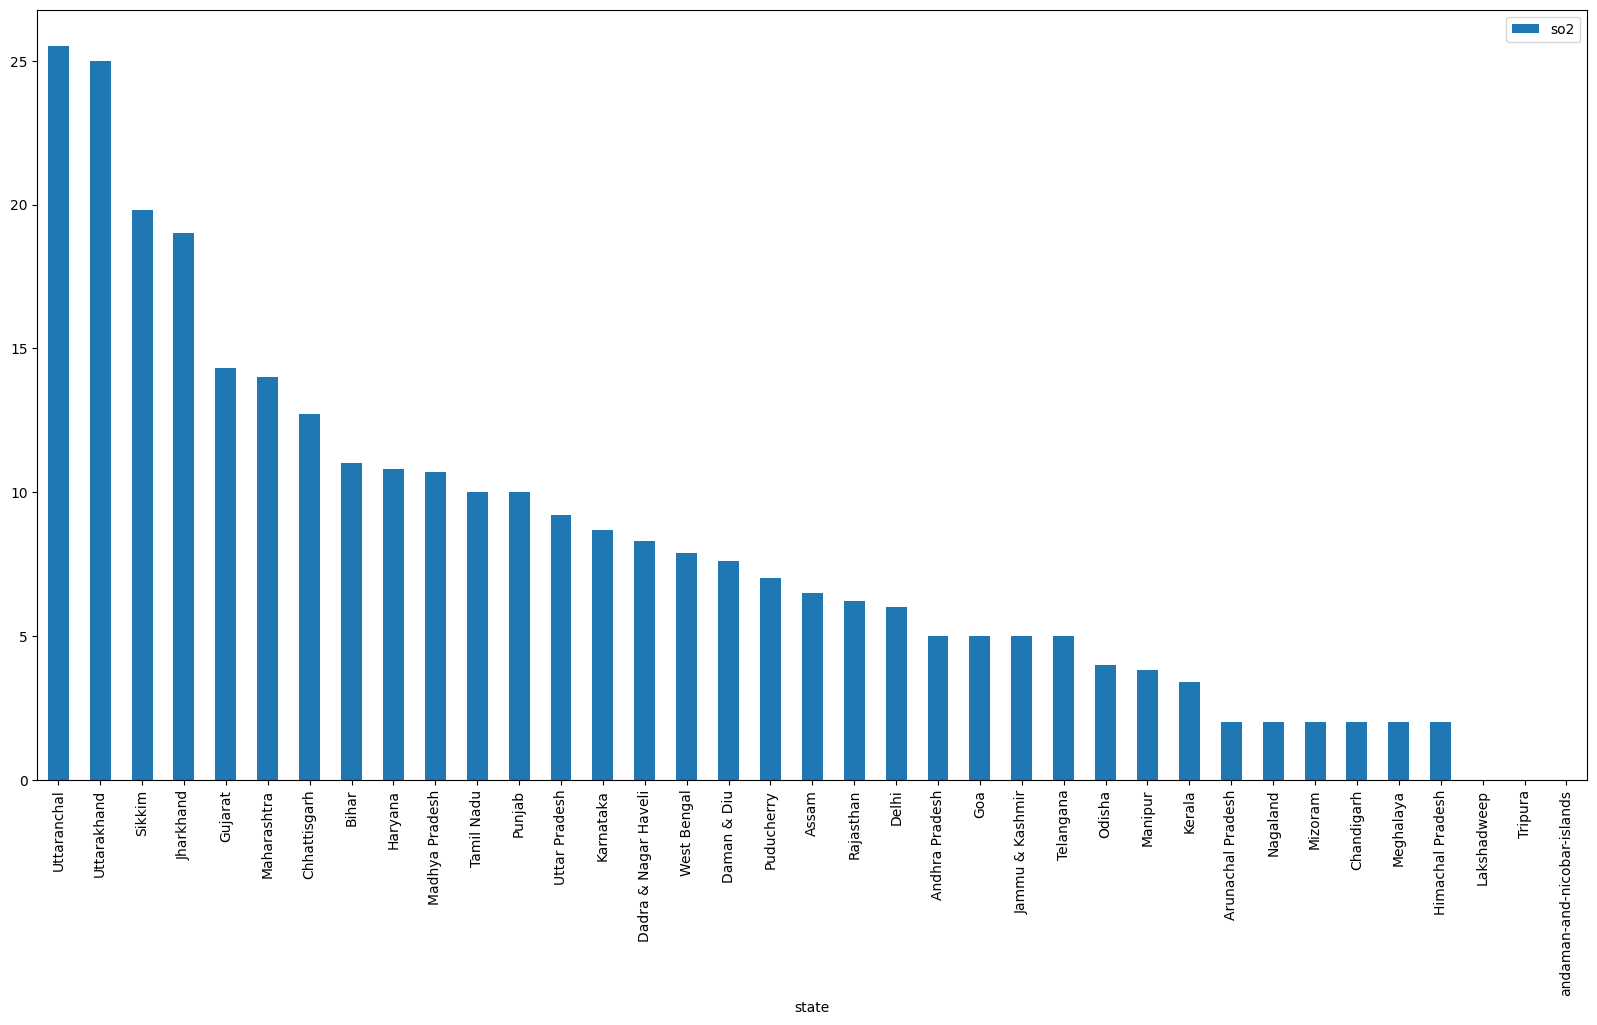

In [14]:
df[['so2', 'state']].groupby(['state']).median().sort_values("so2", ascending = False).plot.bar(figsize=(20,10))


<ipython-input-15-668c65bd54f7>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[['so2','year','state']].groupby(["year"]).median().sort_values(by='year',ascending=False).plot(figsize=(20,10))


<Axes: xlabel='year'>

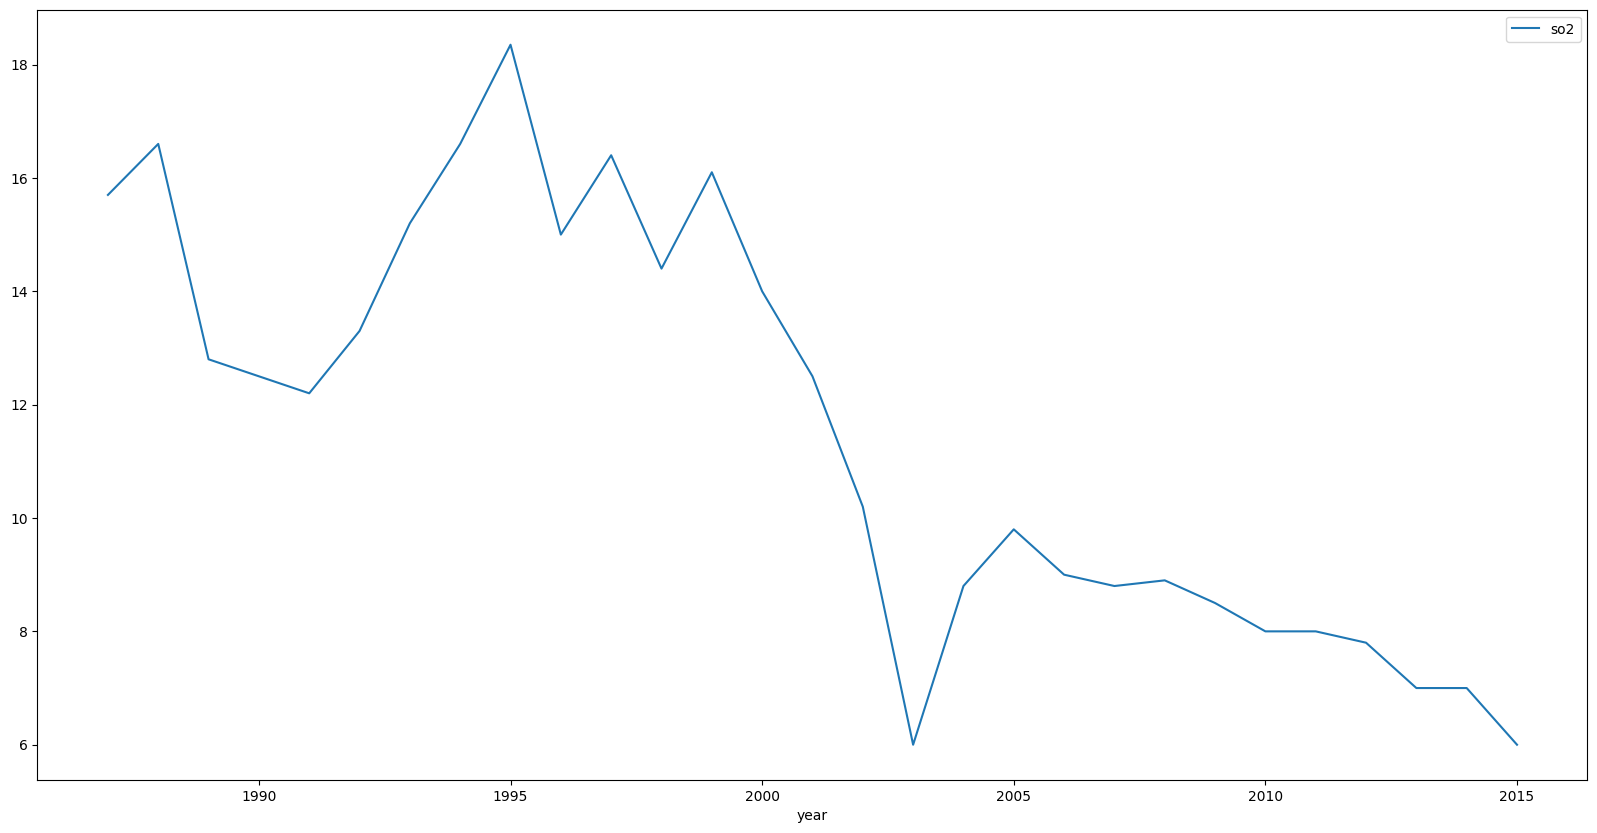

In [15]:
df[['so2','year','state']].groupby(["year"]).median().sort_values(by='year',ascending=False).plot(figsize=(20,10))


NO2

<Axes: xlabel='state'>

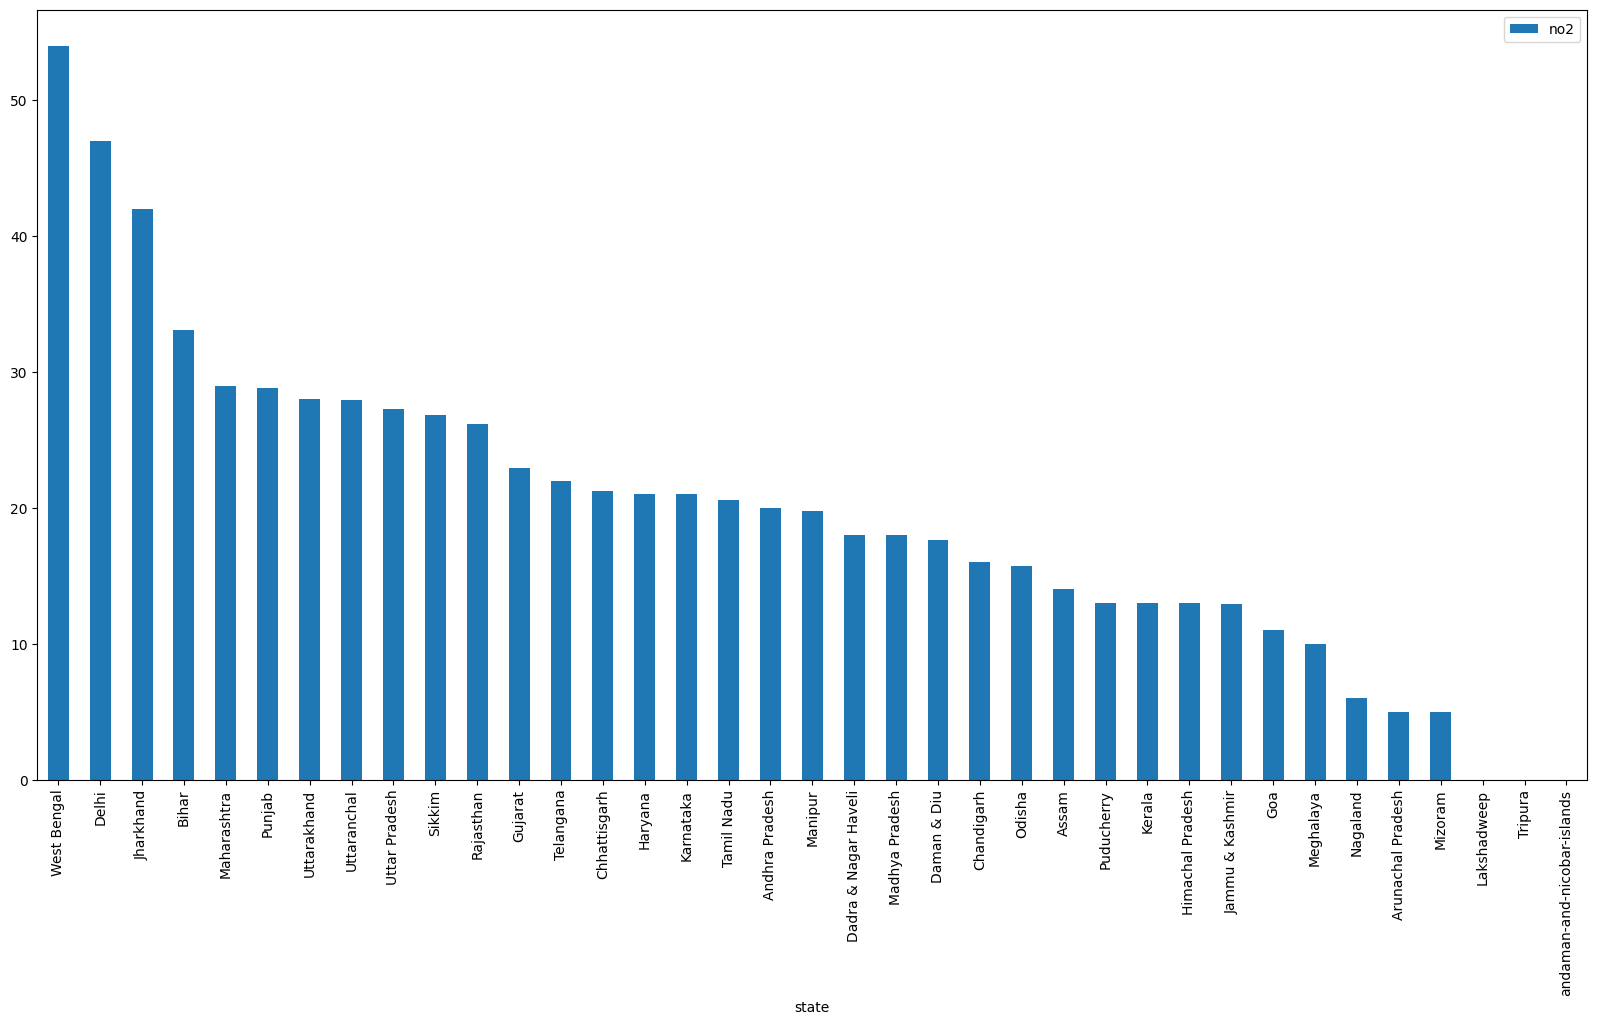

In [16]:
df[['no2', 'state']].groupby(['state']).median().sort_values("no2", ascending = False).plot.bar(figsize=(20,10))


<ipython-input-17-a0a474714c4a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[['no2','year','state']].groupby(["year"]).median().sort_values(by='year',ascending=False).plot(figsize=(20,10))


<Axes: xlabel='year'>

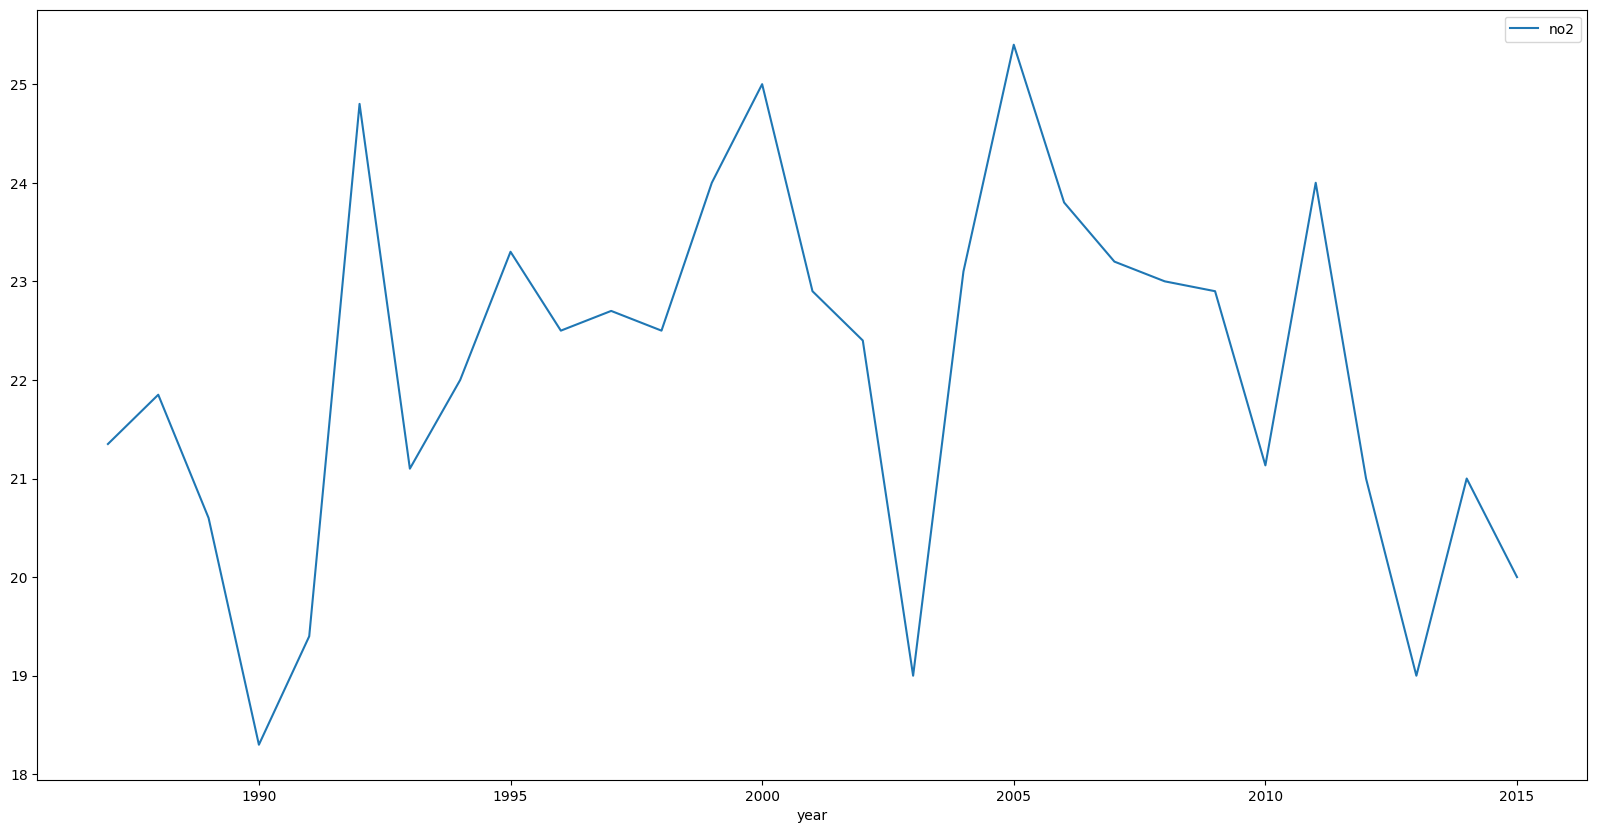

In [17]:
df[['no2','year','state']].groupby(["year"]).median().sort_values(by='year',ascending=False).plot(figsize=(20,10))


SPM

<Axes: xlabel='state'>

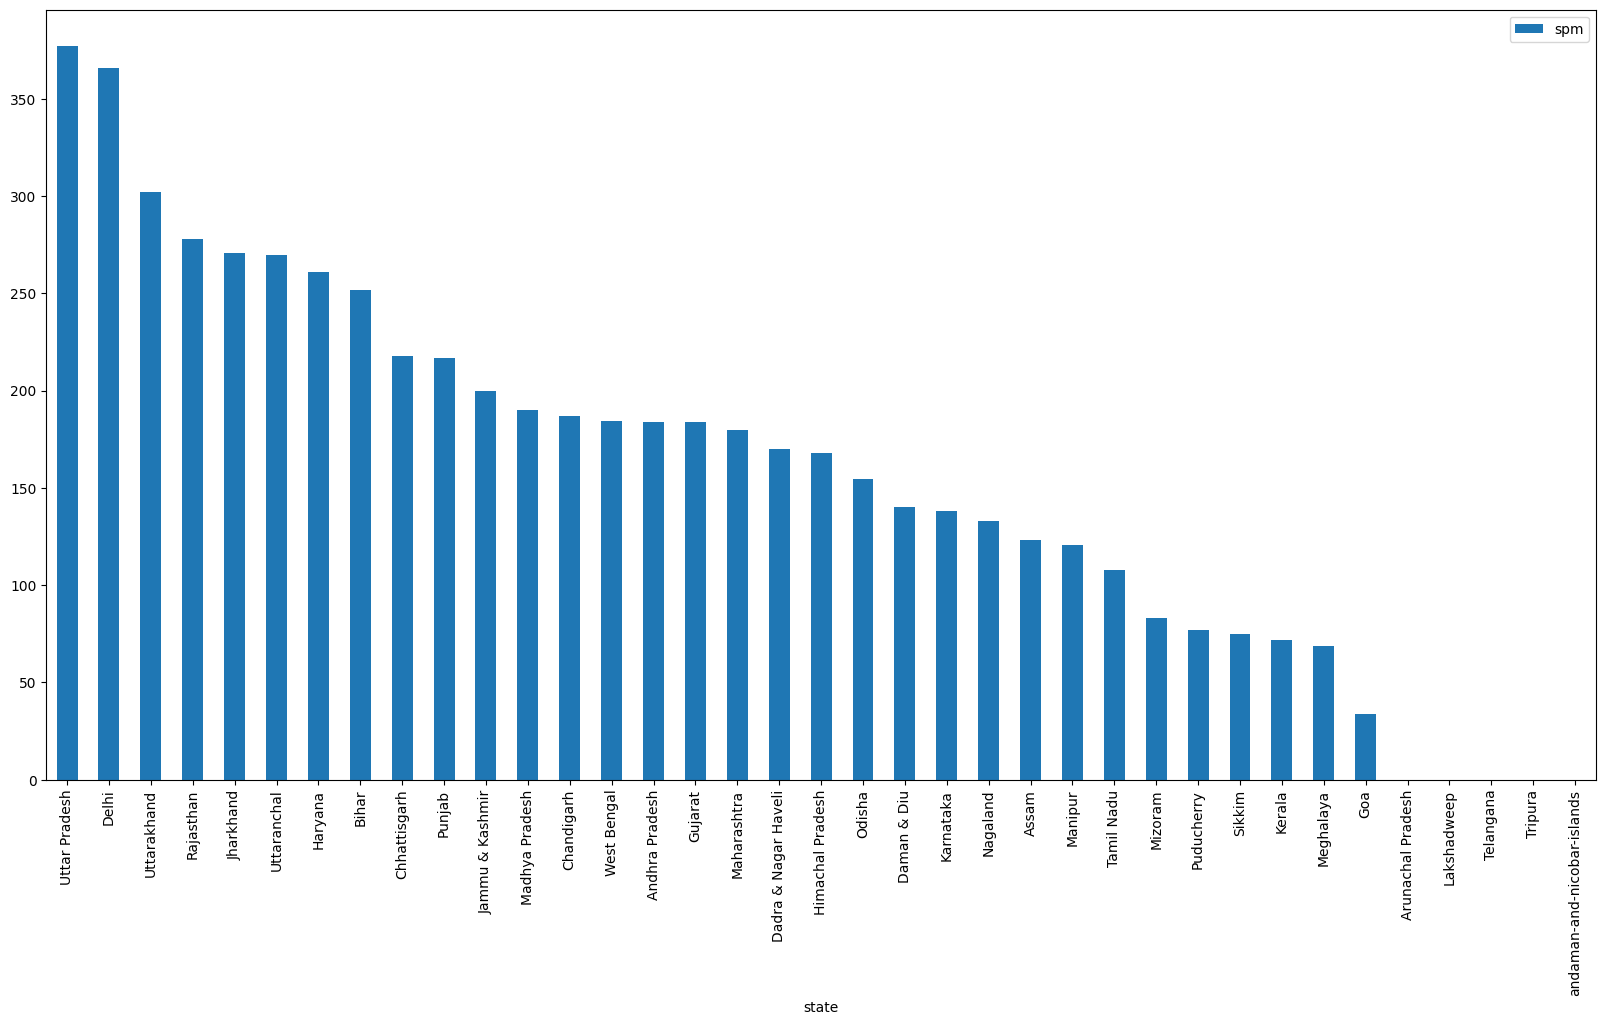

In [18]:
df[['spm', 'state']].groupby(['state']).median().sort_values("spm", ascending = False).plot.bar(figsize=(20,10))


<ipython-input-19-23aea396a7c2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[['spm','year','state']].groupby(["year"]).median().sort_values(by='year',ascending=False).plot(figsize=(20,10))


<Axes: xlabel='year'>

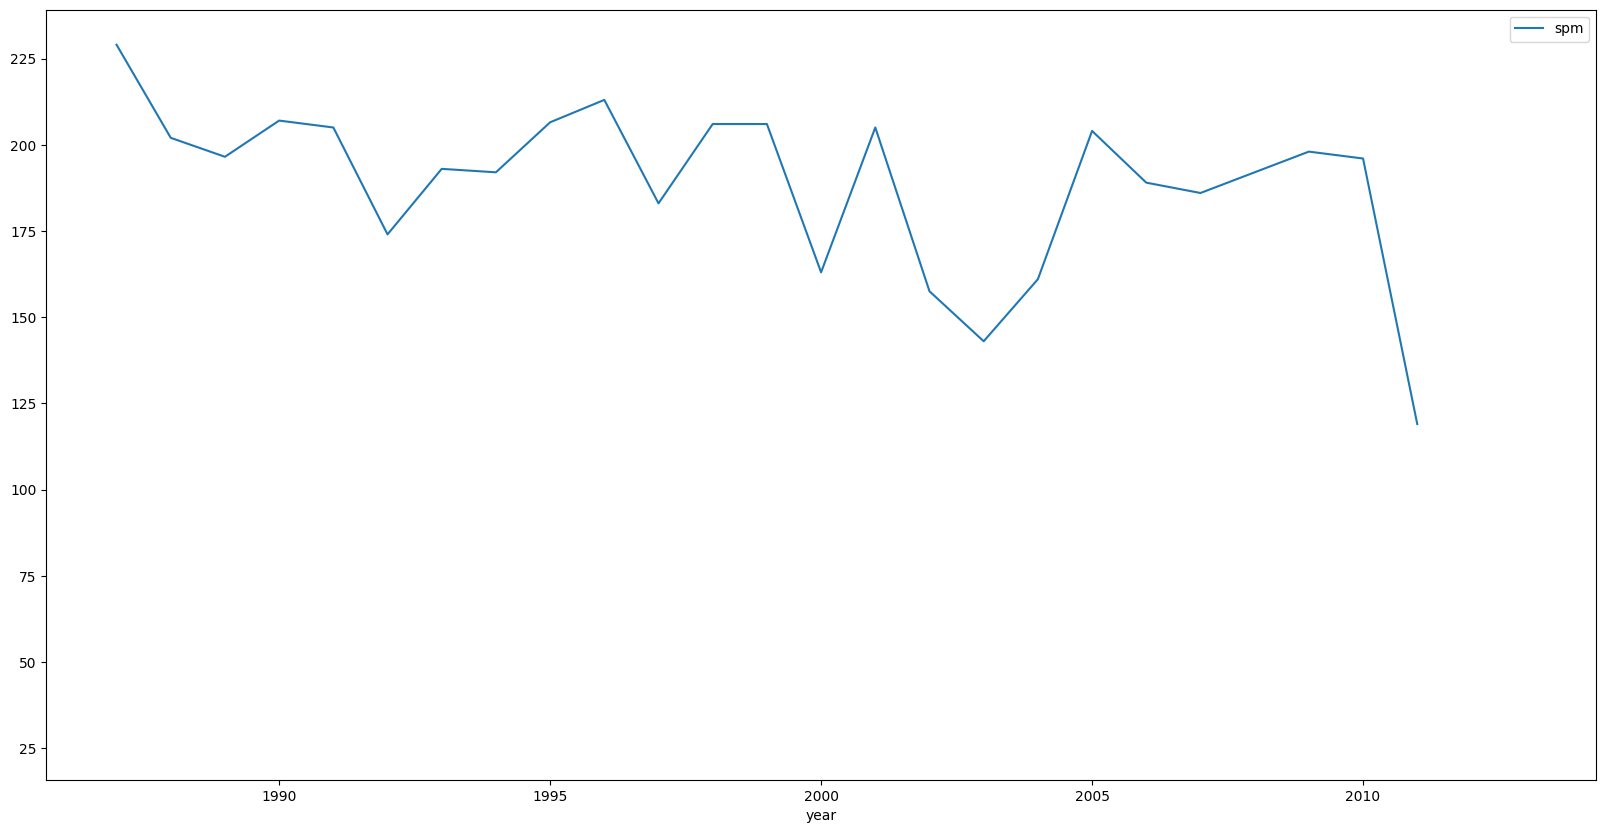

In [19]:
df[['spm','year','state']].groupby(["year"]).median().sort_values(by='year',ascending=False).plot(figsize=(20,10))


PIVOT Tables

<Axes: xlabel='year', ylabel='state'>

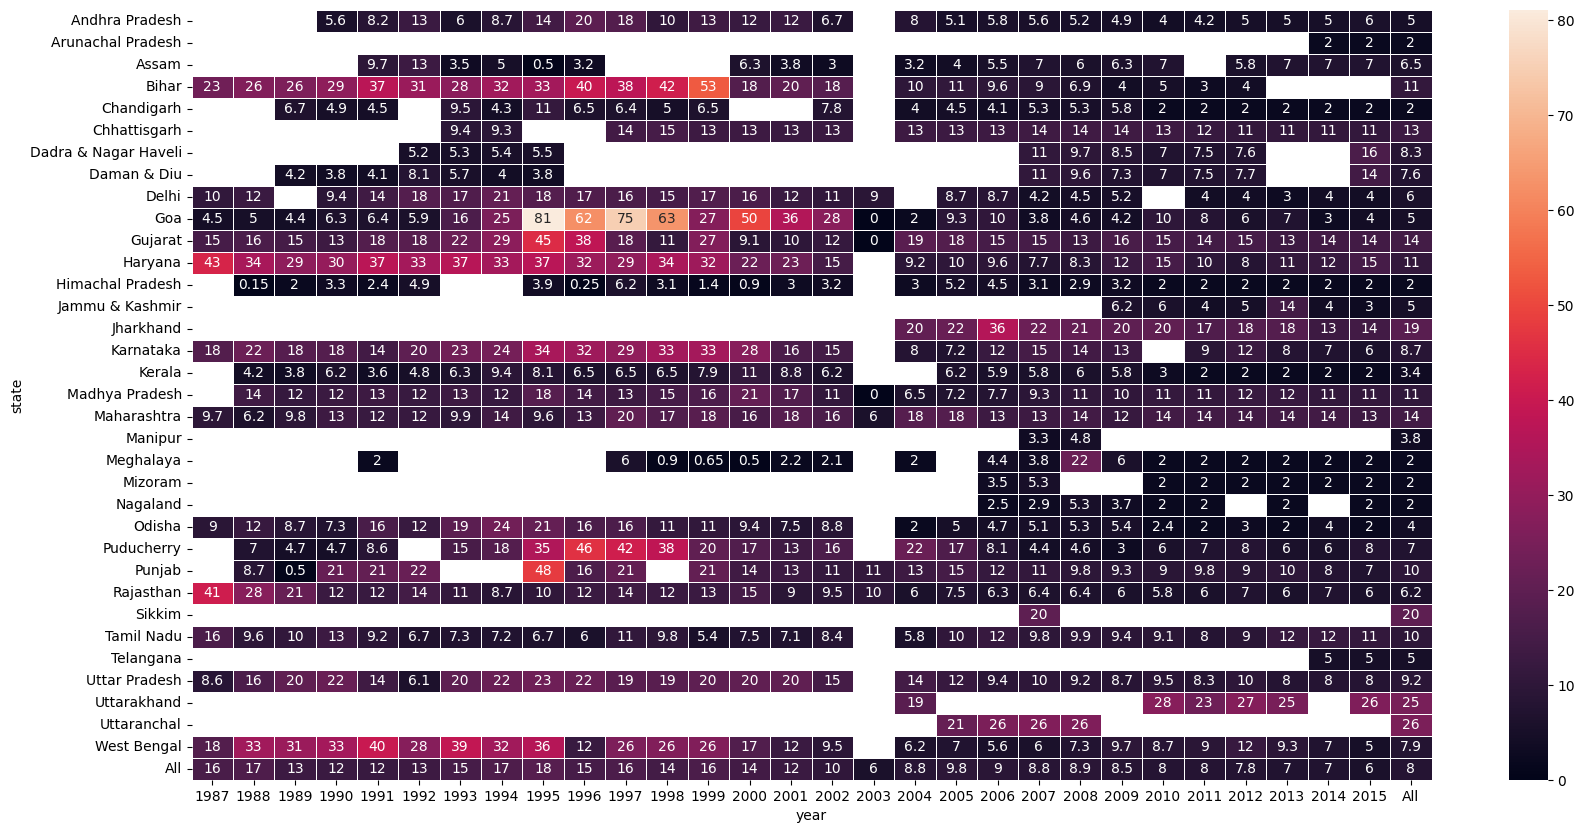

In [20]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df.pivot_table('so2', index='state',columns=['year'],aggfunc='median',margins=True),ax = ax,annot=True, linewidths=.5)

<Axes: xlabel='year', ylabel='state'>

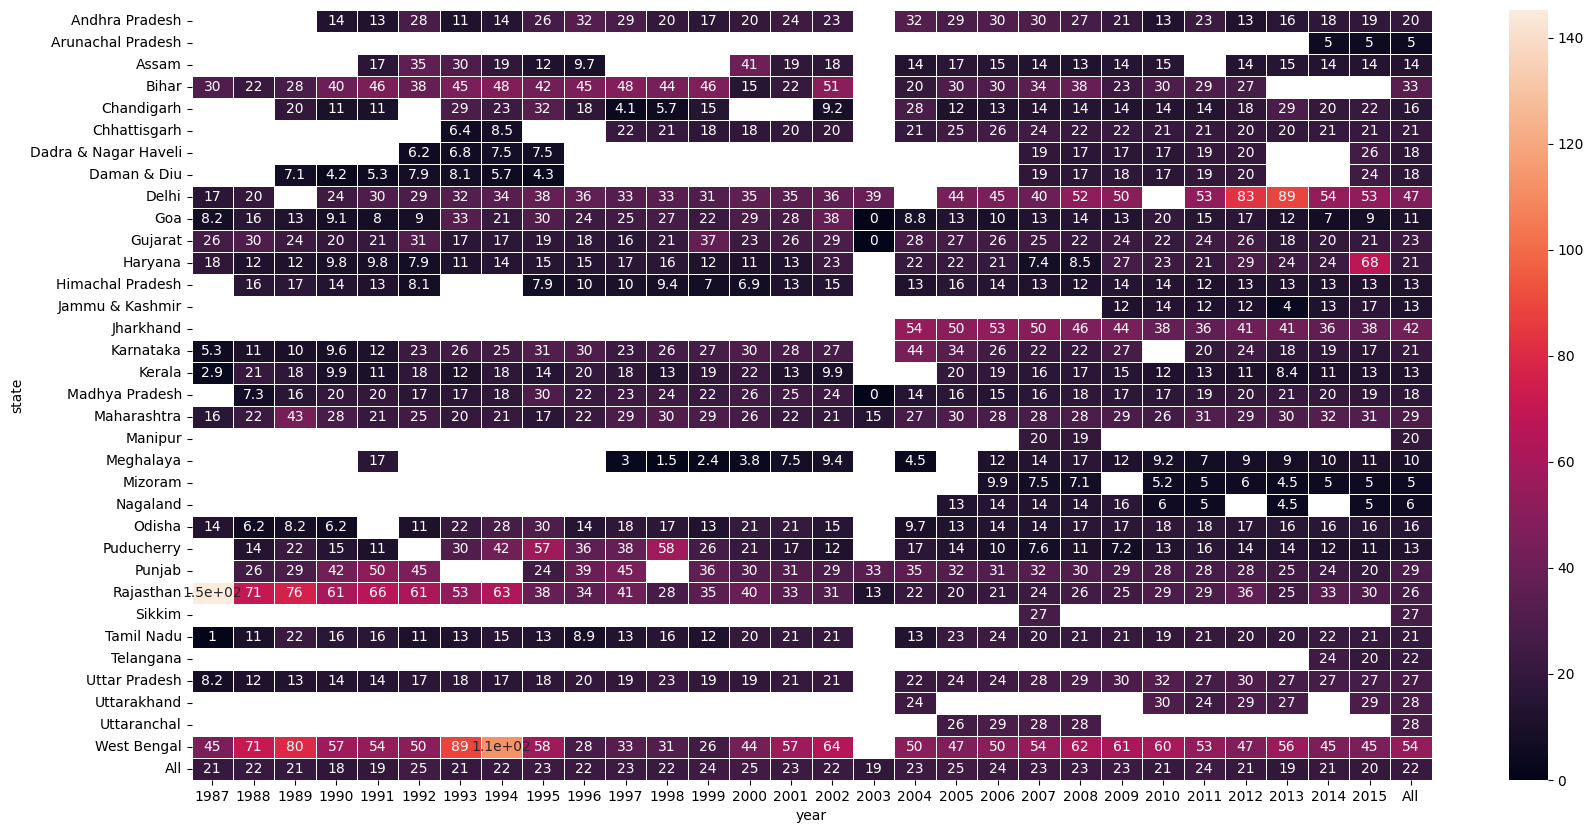

In [21]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df.pivot_table('no2', index='state',columns=['year'],aggfunc='median',margins=True),ax = ax,annot=True, linewidths=.5)


<Axes: xlabel='year', ylabel='state'>

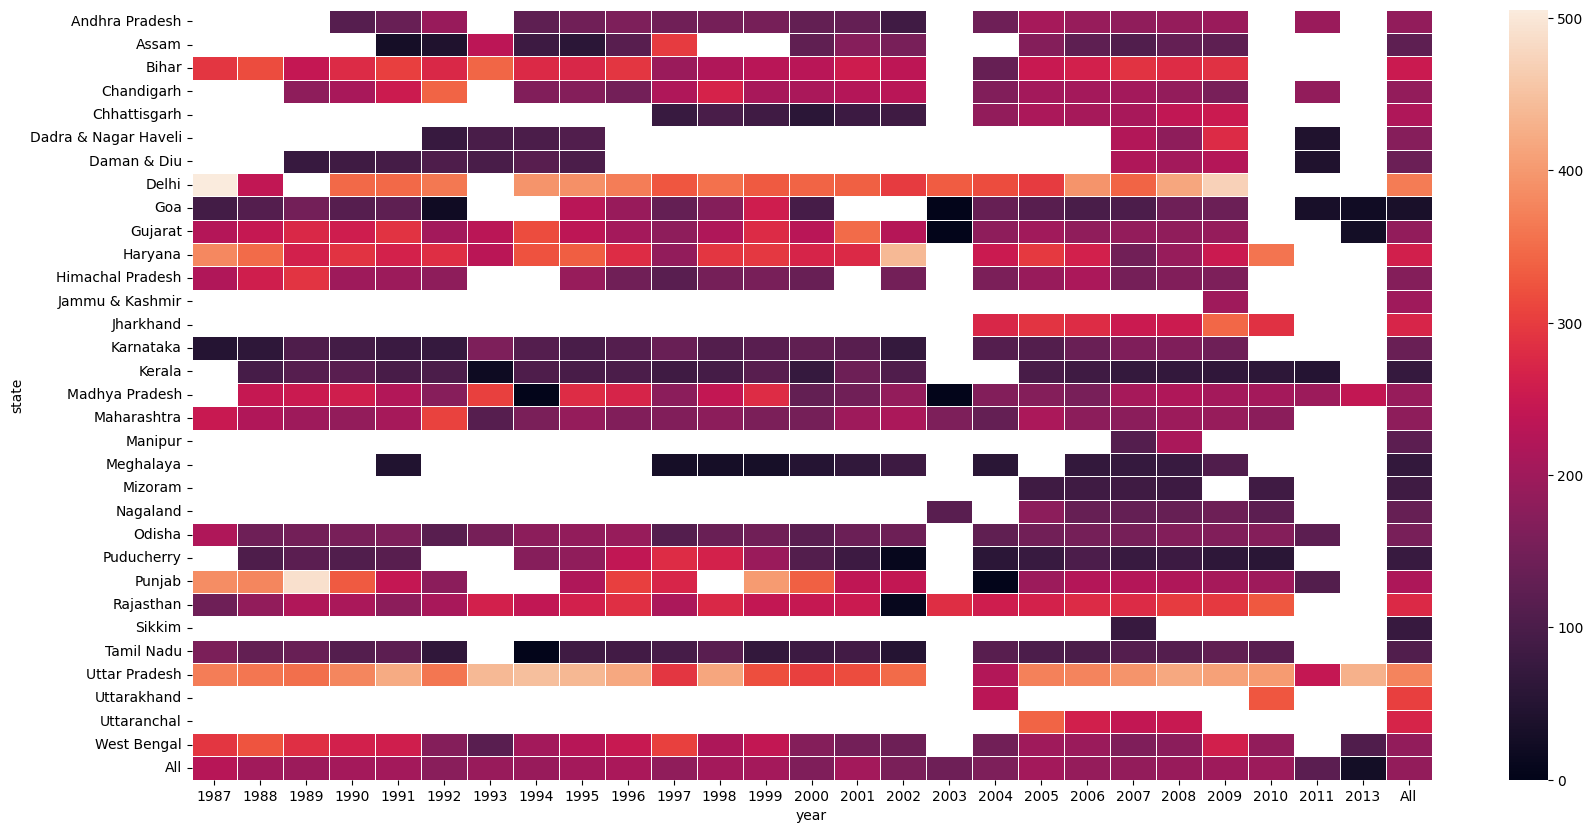

In [22]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df.pivot_table('spm', index='state',columns=['year'],aggfunc='median',margins=True),ax = ax,annot=False, linewidths=.5)

Trends by Regions

<Axes: xlabel='year'>

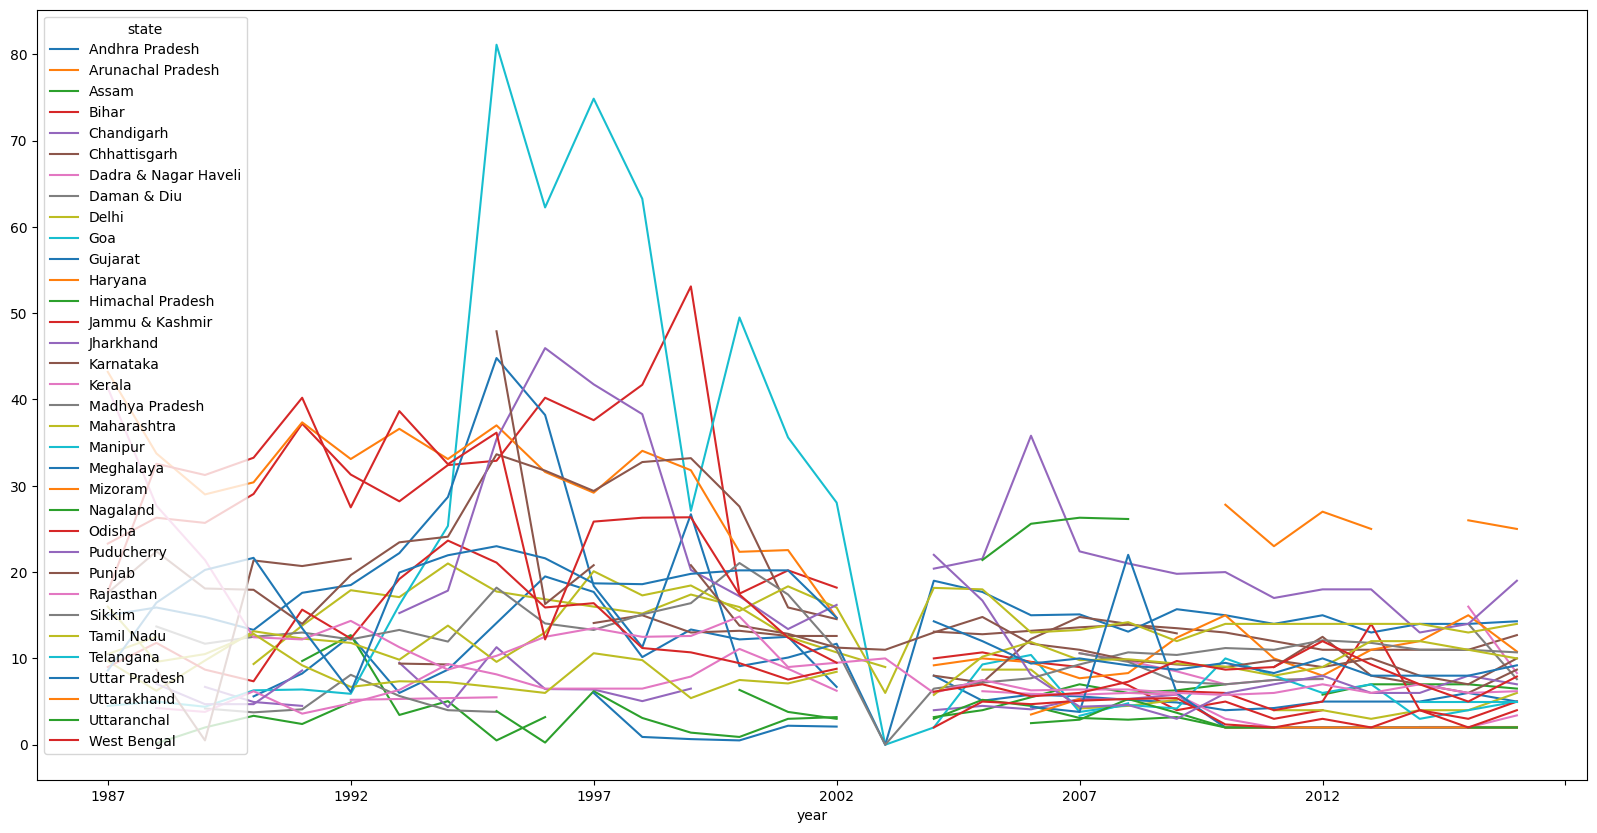

In [23]:
temp = df.pivot_table('so2', index='year',columns=['state'],aggfunc='median',margins=True).reset_index()
temp = temp.drop("All", axis = 1)
temp = temp.set_index("year")
temp.plot(figsize=(20,10))

<Axes: xlabel='year'>

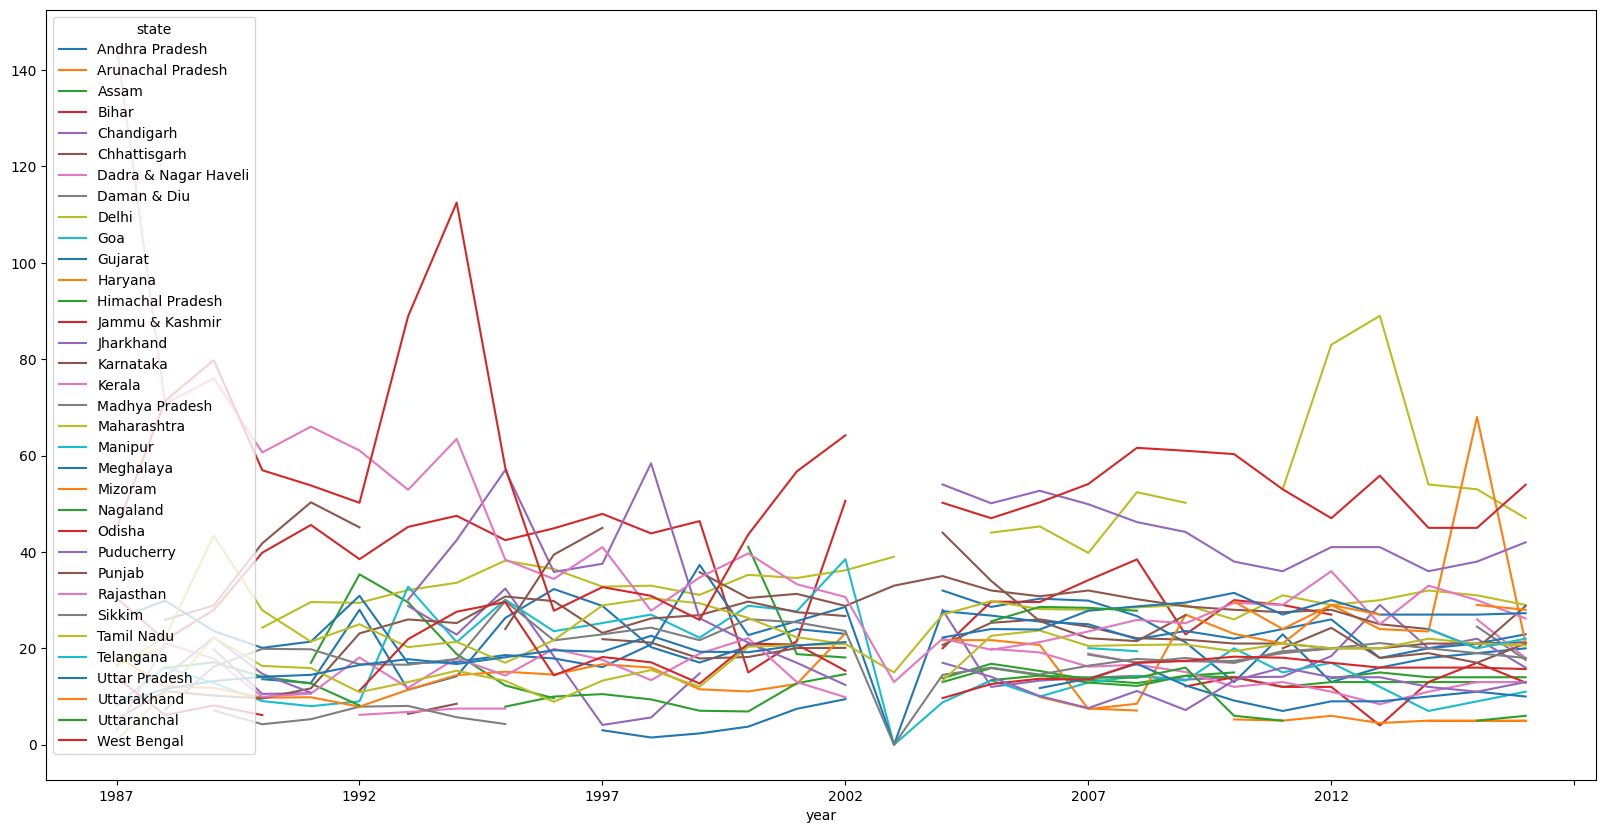

In [24]:
temp = df.pivot_table('no2', index='year',columns=['state'],aggfunc='median',margins=True).reset_index()
temp = temp.drop("All", axis = 1)
temp = temp.set_index("year")
temp.plot(figsize=(20,10))

<Axes: xlabel='year'>

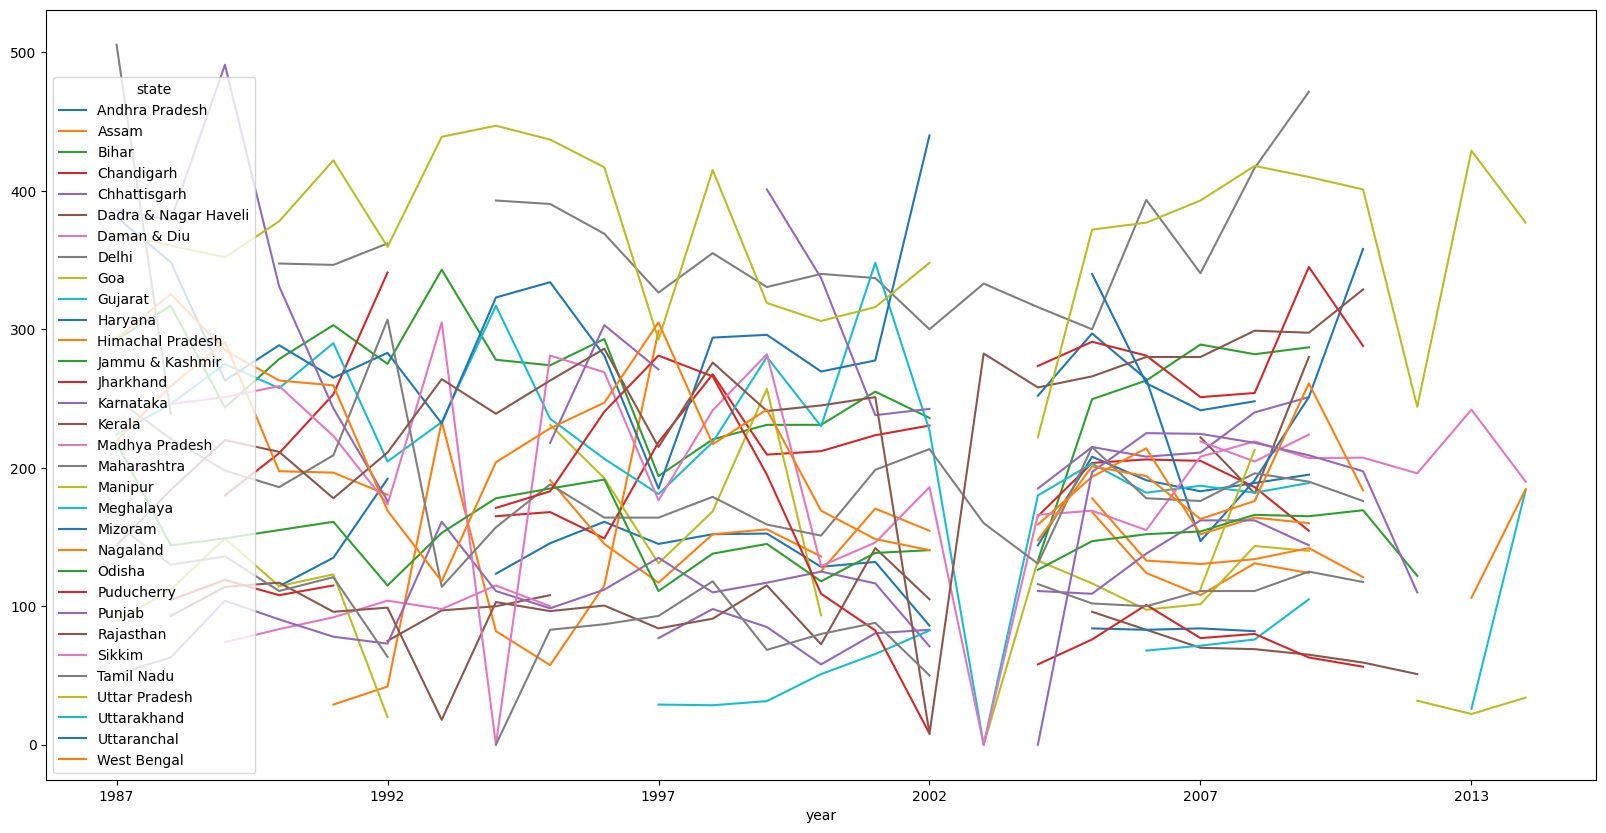

In [25]:
temp = df.pivot_table('spm', index='year',columns=['state'],aggfunc='median',margins=True).reset_index()
temp = temp.drop("All", axis = 1)
temp = temp.set_index("year")
temp.plot(figsize=(20,10))


Time series Analysis

So2

In [26]:
df_so2 = df[["date", "so2"]]
df_so2 = df_so2.set_index("date")
df_so2 = df_so2.dropna()

<Axes: xlabel='date'>

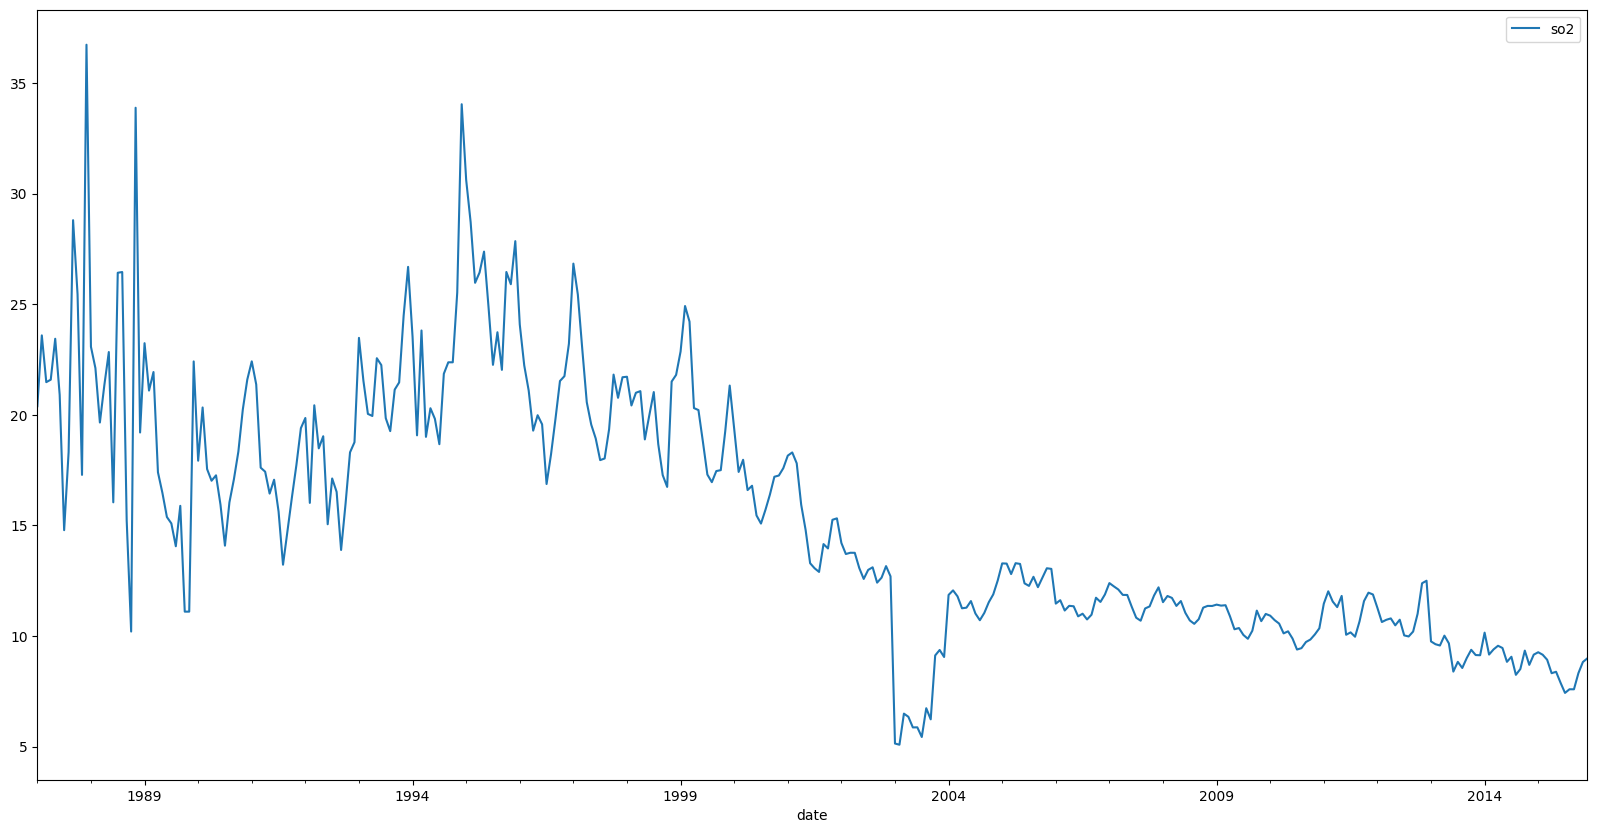

In [27]:
df_so2_resample = df_so2.resample(rule = "M").mean().ffill()
df_so2_resample.plot(figsize = (20,10))


<Axes: xlabel='date'>

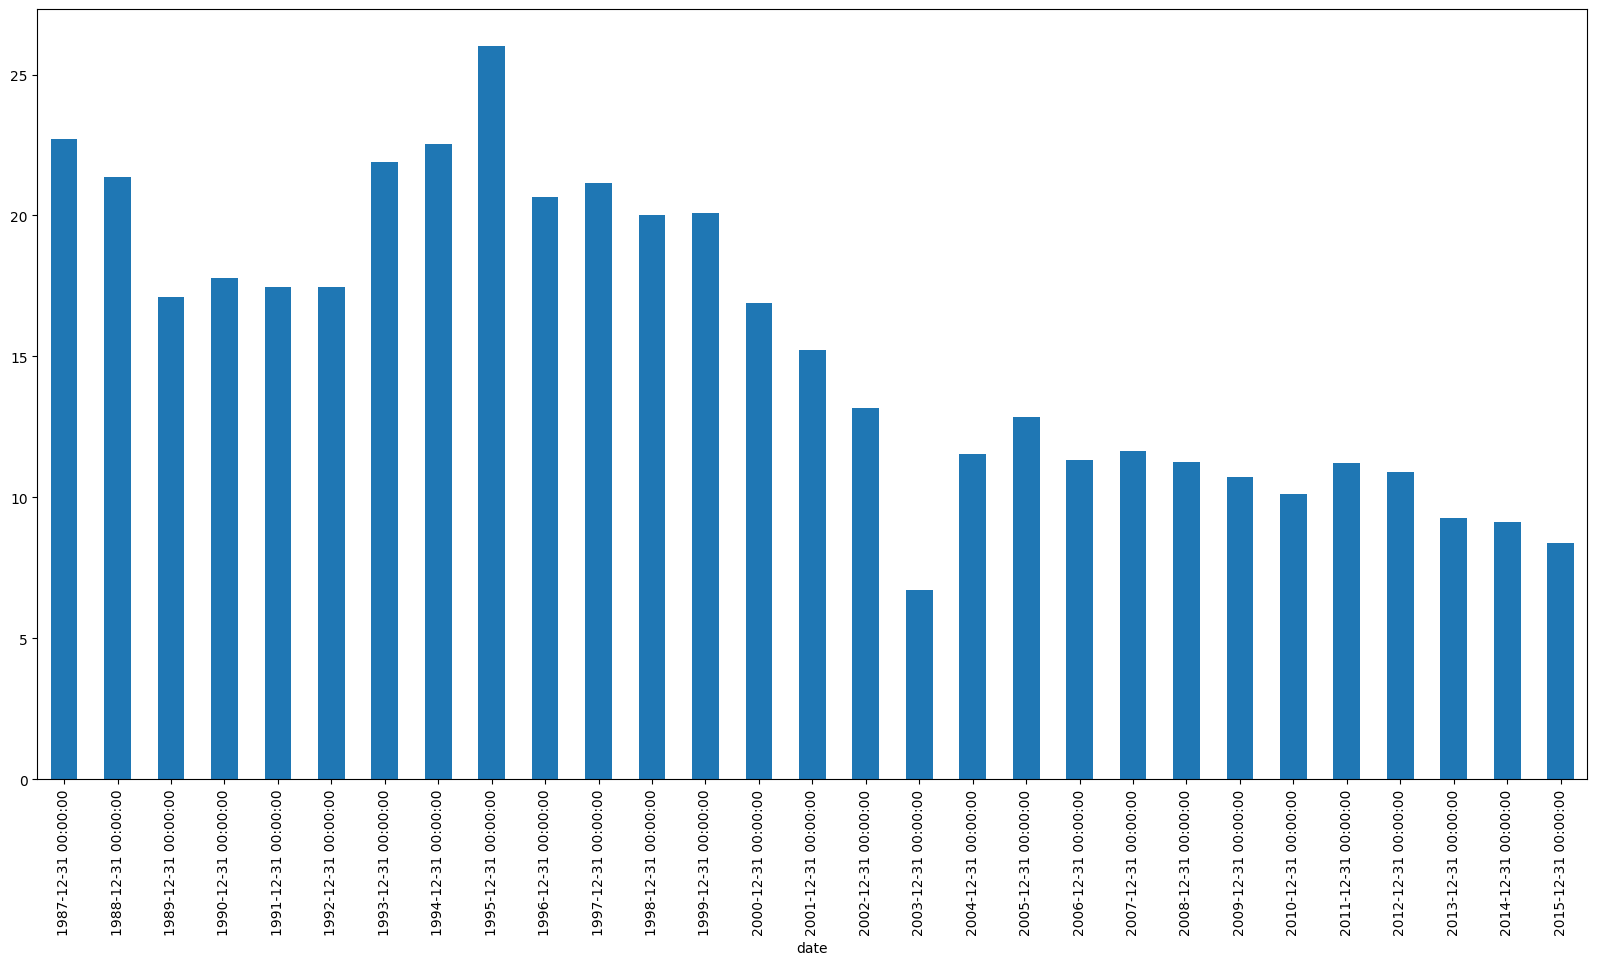

In [28]:
df_so2_resample["so2"].resample("A").mean().plot.bar(figsize = (20,10))


ETS Decomposition (Error Trend Seasonality)

Simple Moving Average

<Axes: xlabel='date'>

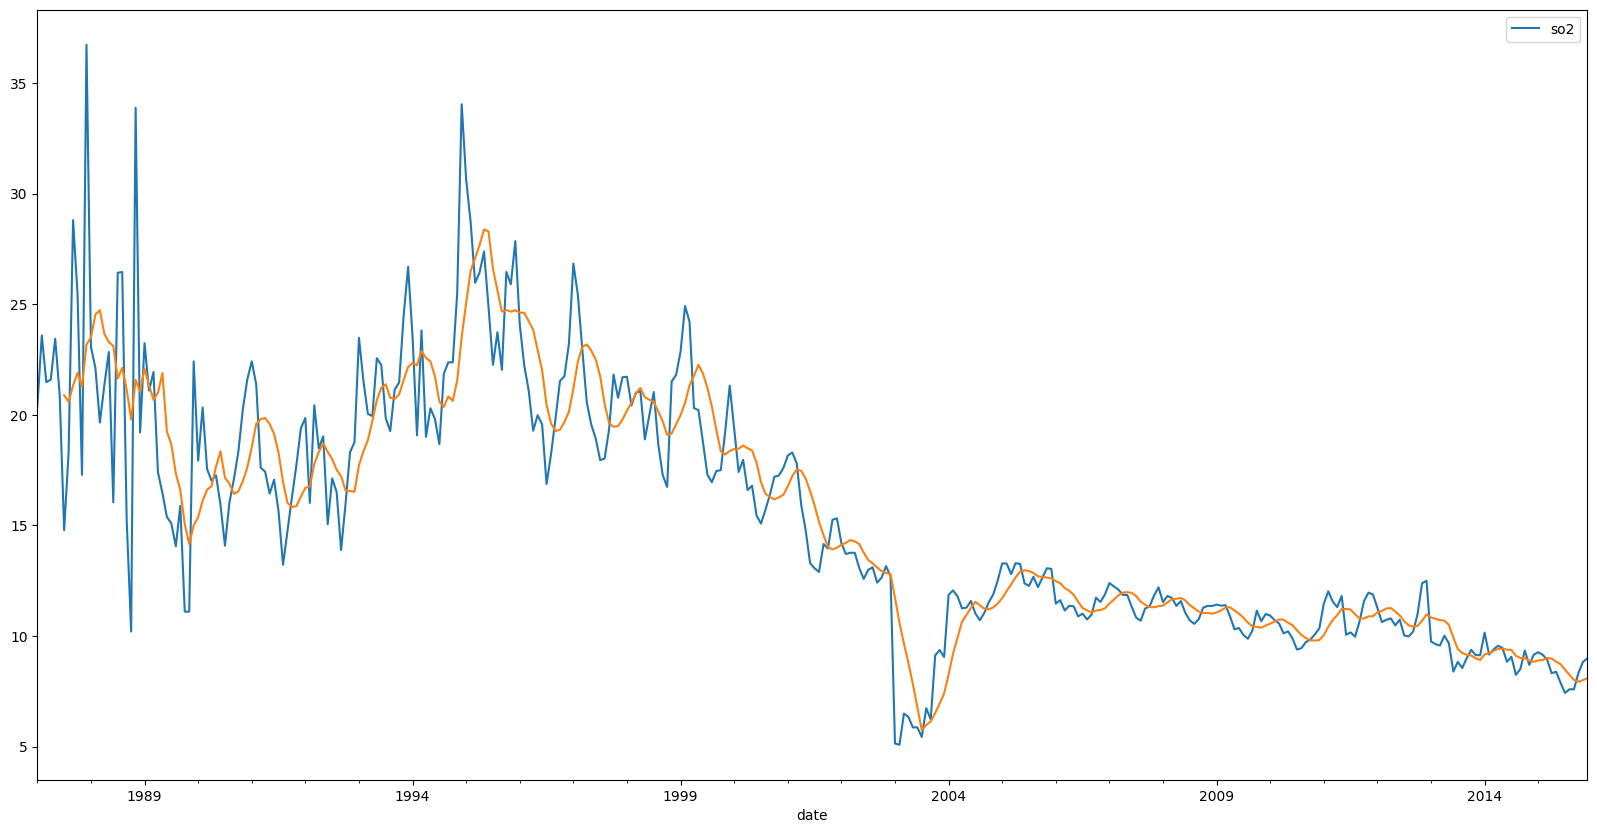

In [29]:
df_so2_resample.plot(figsize = (20,10))
df_so2_resample.rolling(window = 7).mean()["so2"].plot(figsize = (20,10))

Esponential weighted moving average EWMA apply more weight to value more recent

<Axes: xlabel='date'>

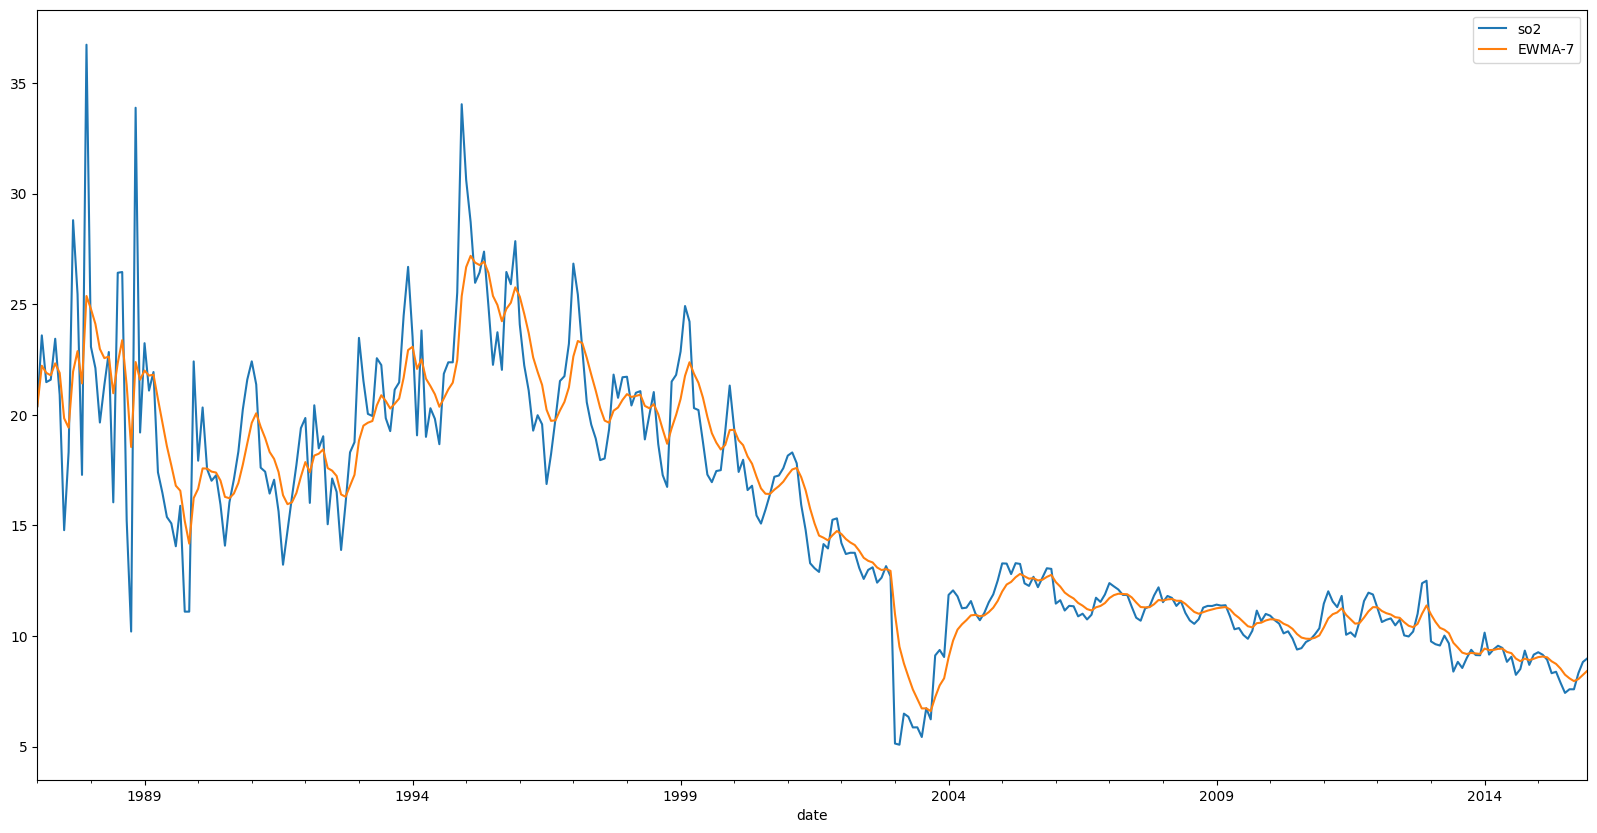

In [31]:
df_so2_resample["EWMA-7"] = df_so2_resample["so2"].ewm(span=7).mean()
df_so2_resample.plot(figsize = (20,10))


ETS

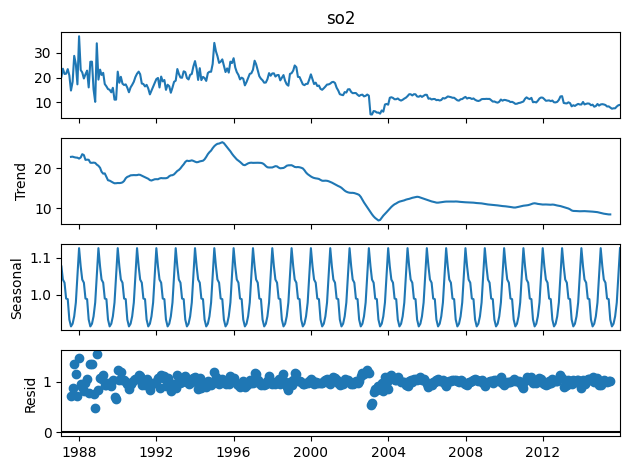

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_so2_resample["so2"], model = "multiplicative")
fig = result.plot()


ARIMA and Seasonal ARIMA

In [33]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_so2_resample["so2"])
print('Augmented Dickey-Fuller Test:')
labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

for value,label in zip(result,labels):
    print(label+' : '+str(value) )

if result[1] <= 0.05:
    print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.3887732131662935
p-value : 0.5876463899272585
#Lags Used : 14
Number of Observations Used : 333
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


The data is sesasonal So we are using Seasonal ARIMA

In [34]:
df_so2_resample["so2_first_diff"] = df_so2_resample["so2"] - df_so2_resample["so2"].shift(7)
# CHECK
result = adfuller(df_so2_resample["so2_first_diff"].dropna() )
print('Augmented Dickey-Fuller Test:')
labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

for value,label in zip(result,labels):
    print(label+' : '+str(value) )

if result[1] <= 0.05:
    print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

Augmented Dickey-Fuller Test:
ADF Test Statistic : -4.264624632775815
p-value : 0.0005112203813366719
#Lags Used : 17
Number of Observations Used : 323
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='date'>

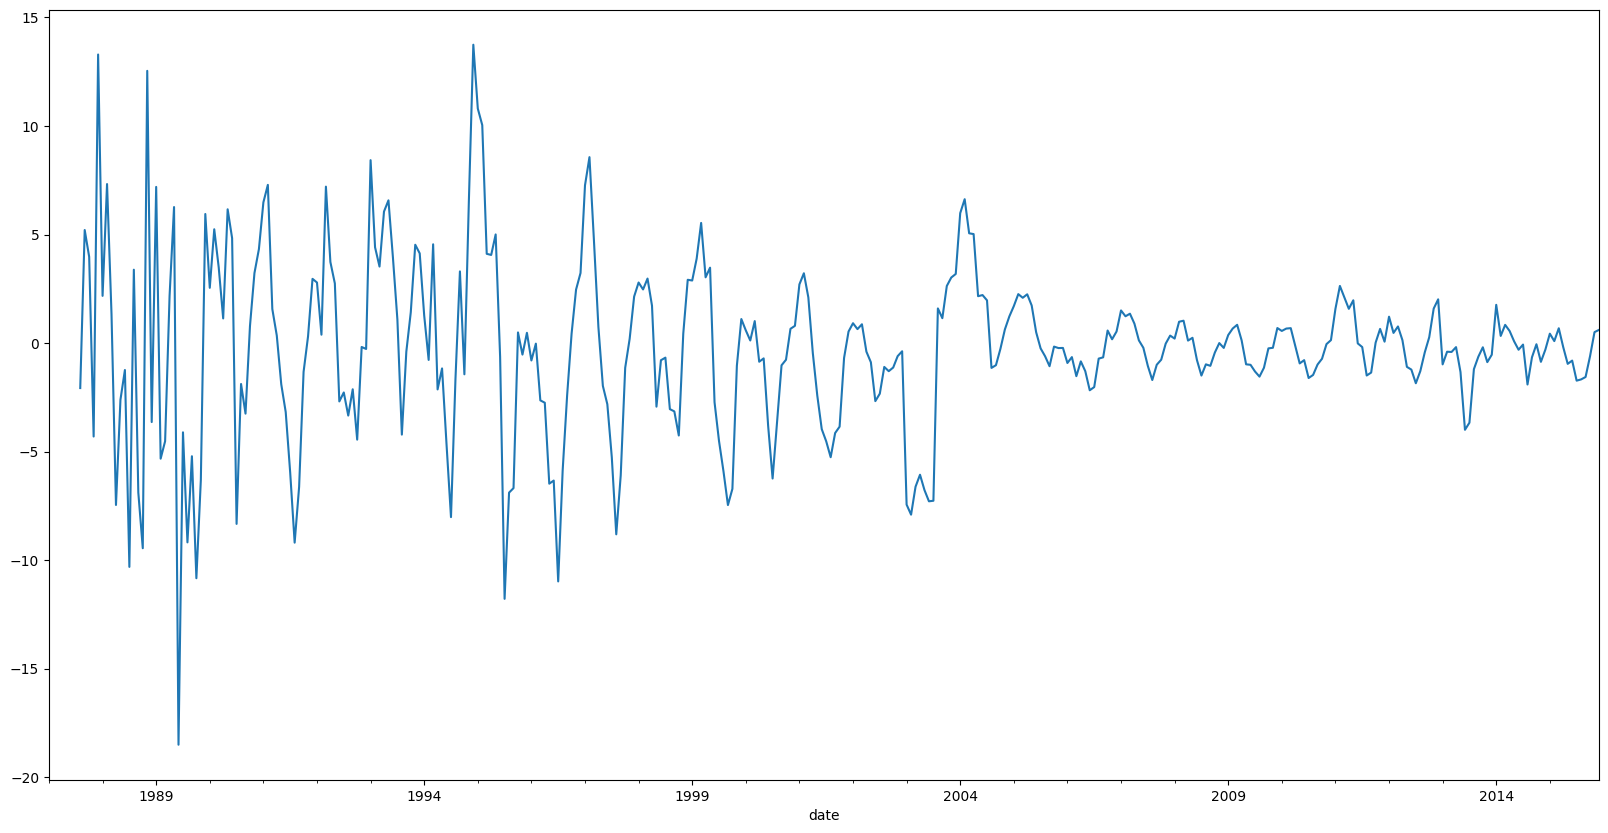

In [35]:
df_so2_resample["so2_first_diff"].plot(figsize = (20,10))


<Axes: xlabel='date'>

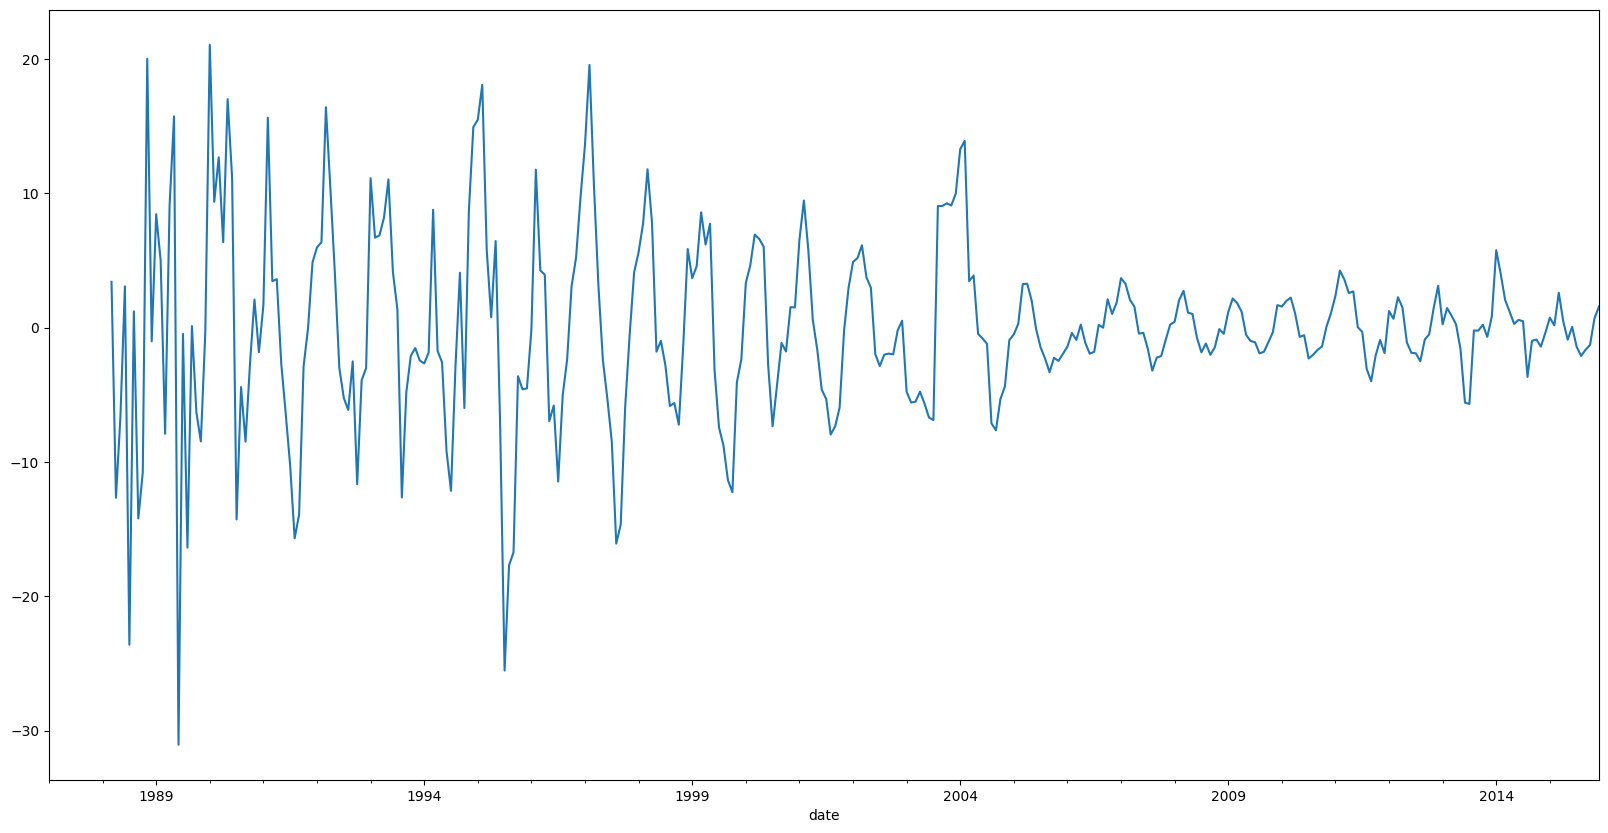

In [36]:
df_so2_resample["so2_second_diff"] = df_so2_resample["so2_first_diff"] - df_so2_resample["so2_first_diff"].shift(7)
df_so2_resample["so2_second_diff"].plot(figsize = (20,10))

USing Seasonal ARIMA model

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                                  so2   No. Observations:                  348
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 48)   Log Likelihood                -760.884
Date:                              Tue, 05 Dec 2023   AIC                           1527.768
Time:                                      19:36:41   BIC                           1538.869
Sample:                                  01-31-1987   HQIC                          1532.211
                                       - 12-31-2015                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L48      -0.1186      0.249     -0.476      0.634      -0.607       0.370
ma.S.L48      -0.25

<Axes: xlabel='date'>

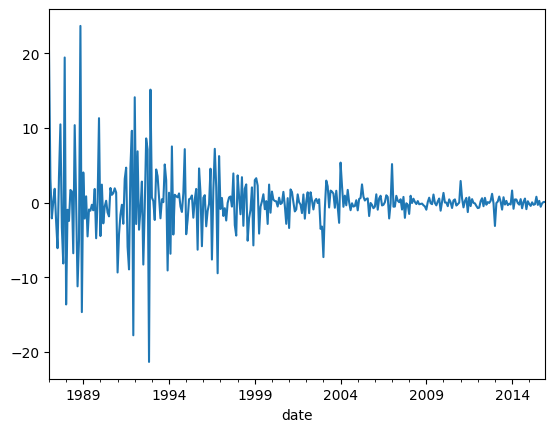

In [37]:
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(df_so2_resample["so2"],order=(0,1,0), seasonal_order=(1,1,1,48))
results = model.fit()
print(results.summary())
results.resid.plot()

<Axes: ylabel='Density'>

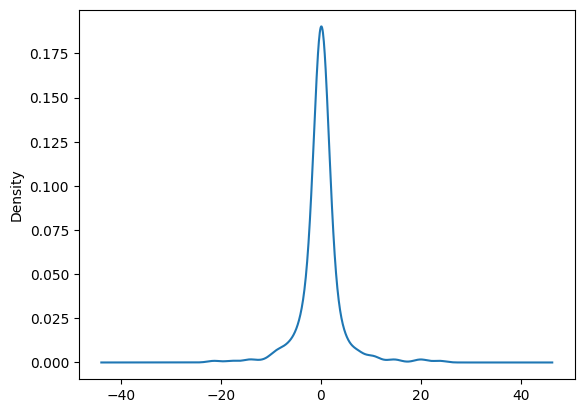

In [38]:
results.resid.plot(kind='kde')

Checking with known data

<Axes: xlabel='date'>

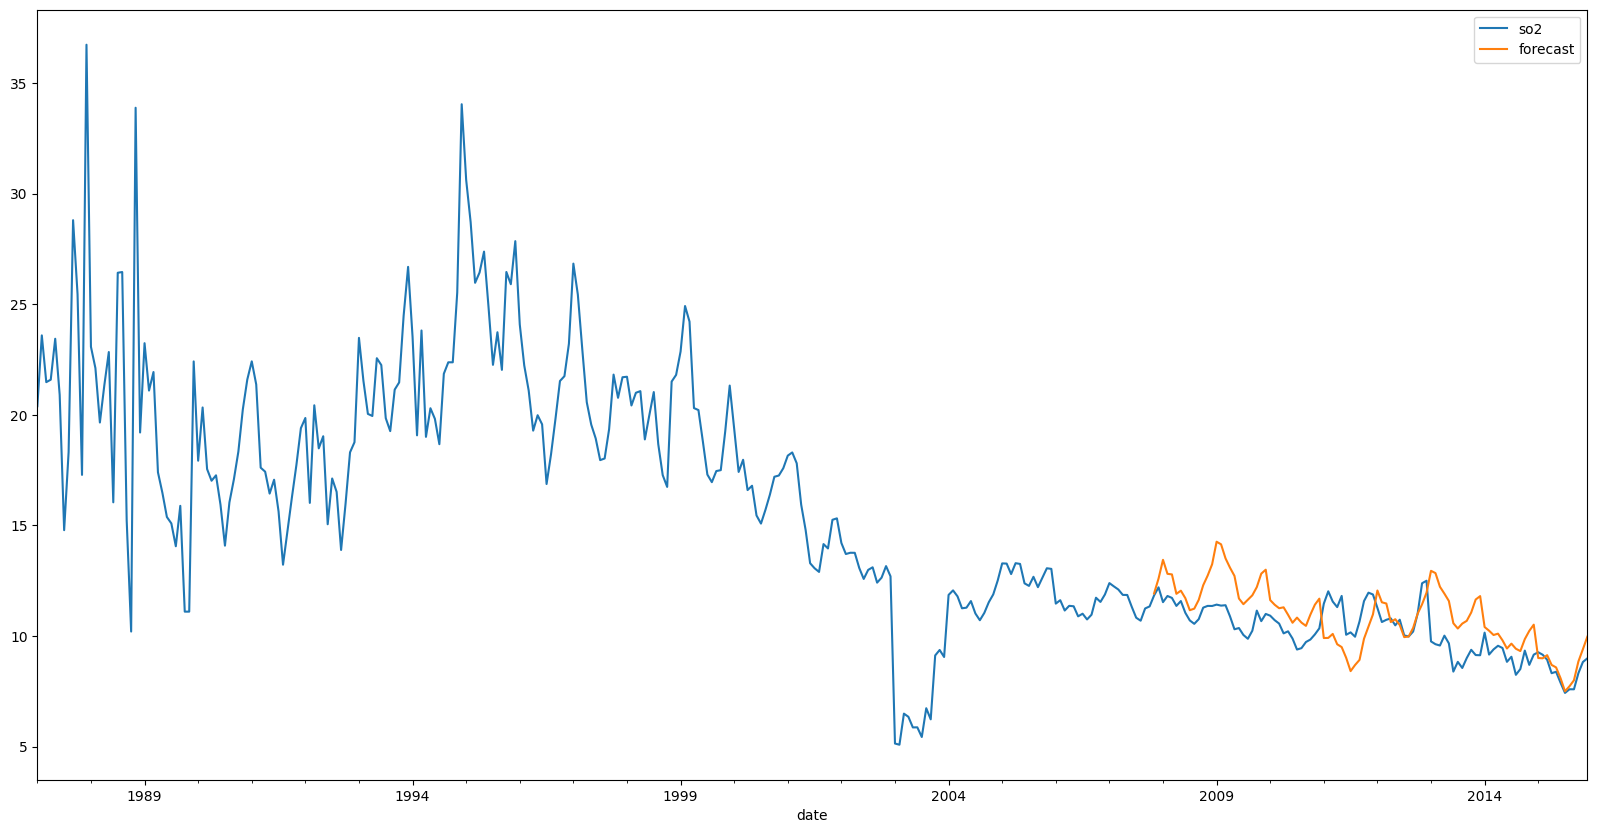

In [39]:
df_so2_resample['forecast'] = results.predict(start = 250, end= 400, dynamic= True)
df_so2_resample[['so2','forecast']].plot(figsize=(20,10))

Forecasting


*   So2




<Axes: >

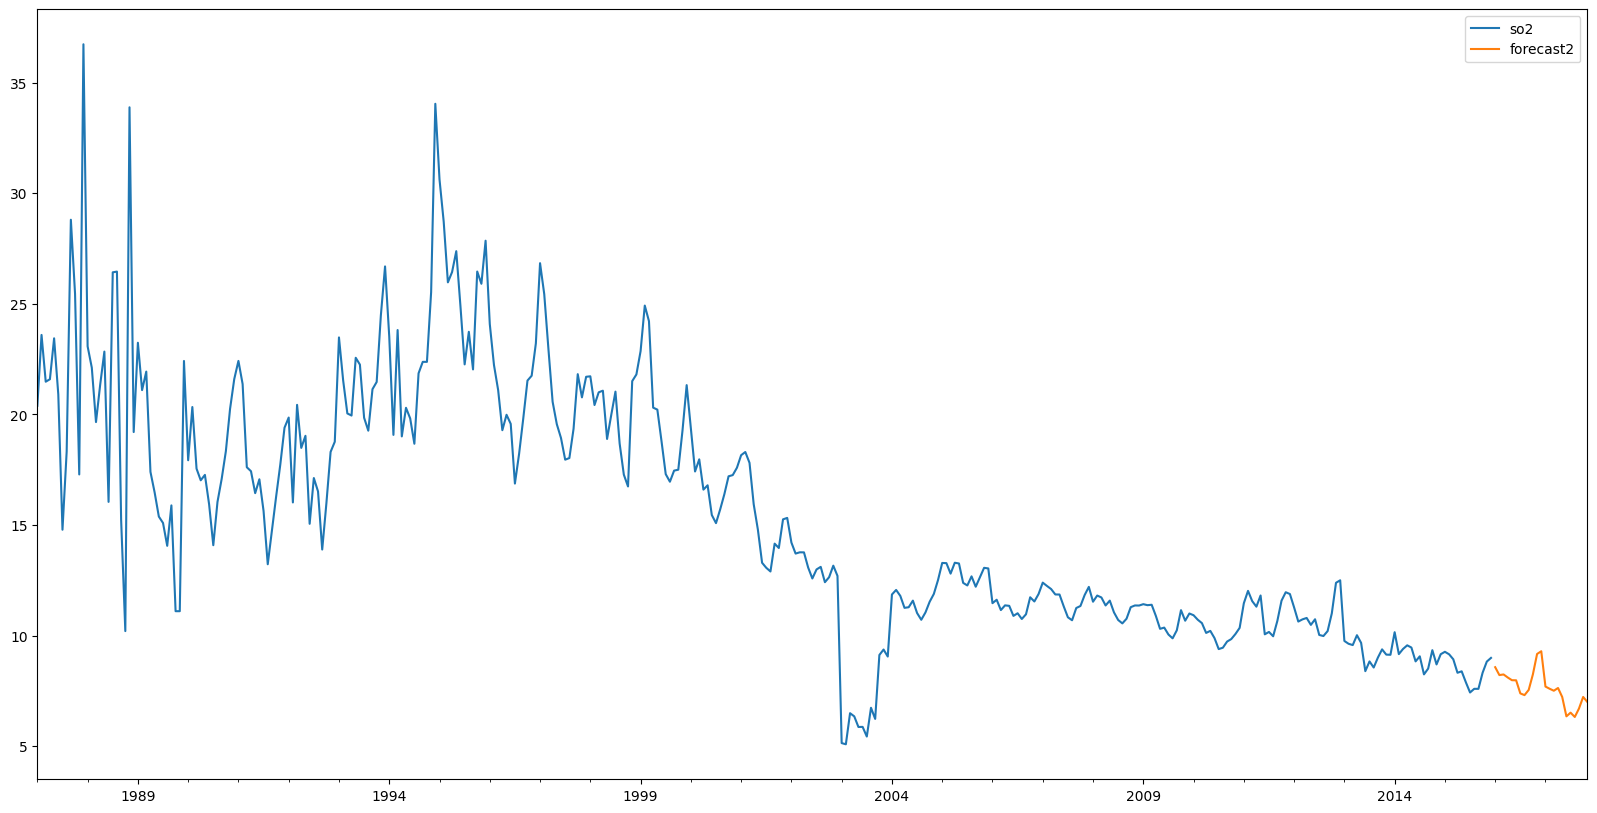

In [40]:
from pandas.tseries.offsets import DateOffset
future_dates = [df_so2_resample.index[-1] + DateOffset(months=x) for x in range(0,24) ]
future_dates_df = pd.DataFrame(index=future_dates[1:],columns=df_so2_resample.columns)
future_df = pd.concat([df_so2_resample,future_dates_df])
future_df['forecast2'] = results.predict(start = 348, end = 540, dynamic= True)
future_df[['so2', 'forecast2']].plot(figsize=(20, 10))

In [ ]:
df_so2_resample.plot(figsize = (20,10))
df_so2_resample.rolling(window = 7).mean()["so2"].plot(figsize = (20,10))

df_so2_resample["EWMA-7"] = df_so2_resample["so2"].ewm(span=7).mean()
df_so2_resample.plot(figsize = (20,10))
